### Importing Libraries 

In [1174]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import corner

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

### Reading Dataset 

In [922]:
data = pd.read_csv("cost_of_living_us.csv")
data.head() #Display First 5 Records of Data

case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240   7460.20308          12361.77720   
3                1p3c   15257.15040   9952.23924          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000   6392.94504   
1       8659.55640              6217.45896       6147.8298   7422.07836   
2      11581.63260              7075.65816      15824.6940   9769.56228   
3      14503.70760              9134.35620      18802.1892  13101.70320   
4      17425.78560              9942.36396      18802.1892  13469.21880   

    total_cost  median_family_income  
0   39254.0532          73010.414062  
1   57194.3256          73010.414062  
2   76141.0308          73010.414062  
3   94203.5328          73010.414062  
4  100823.5200          73010.414062

In [923]:
data.shape # display the count of Row and Column

(31430, 15)

In [924]:
#  Dropping columns that are not relevant for the clustering model, such as identifiers (case_id) 
# and non-numeric features (state, isMetro, areaname, county)

In [925]:
data.drop(columns = {"case_id","state","areaname","taxes"},axis=1,inplace=True)

In [926]:
data.shape

(31430, 11)

In [927]:
data.head()

isMetro          county family_member_count  housing_cost    food_cost  \
0     True  Autauga County                1p0c    8505.72876   3454.91712   
1     True  Autauga County                1p1c   12067.50240   5091.70788   
2     True  Autauga County                1p2c   12067.50240   7460.20308   
3     True  Autauga County                1p3c   15257.15040   9952.23924   
4     True  Autauga County                1p4c   15257.15040  12182.21400   

   transportation_cost  healthcare_cost  other_necessities_cost  \
0          10829.16876       5737.47984              4333.81344   
1          11588.19288       8659.55640              6217.45896   
2          12361.77720      11581.63260              7075.65816   
3          13452.18600      14503.70760              9134.35620   
4          13744.59840      17425.78560              9942.36396   

   childcare_cost   total_cost  median_family_income  
0          0.0000   39254.0532          73010.414062  
1       6147.8298   57194.3256          73010.414062  
2      15824.6940   76141.0308          73010.414062  
3      18802.1892   94203.5328          73010.414062  
4      18802.1892  100823.5200          73010.414062

### Statistical Summary

In [929]:
#Statistical summary of numerical variables in dataset
# Numeric features

data.iloc[:, :].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [930]:
# First Moment: Mean
mean = data.mean(numeric_only=True)
median = data.median(numeric_only=True)

# Second Moment: standard_deviation
standard_deviation = data.std(numeric_only=True)

# Third Moment: Skewness
skewness = data.skew(numeric_only=True)

# Fourth Moment: Kurtosis
kurtosis = data.kurtosis(numeric_only=True)

# Print the results
print(f"First Moment (Mean):\n,{mean}")
print(f"\nFirst Moment (Median):\n {median}")
print("\nSecond Moment (std):\n", standard_deviation)
print("\nThird Moment (Skewness):\n", skewness)
print("\nFourth Moment (Kurtosis):\n", kurtosis)

First Moment (Mean):
,isMetro                       0.372256
housing_cost              11073.673539
food_cost                  8287.504557
transportation_cost       13593.856381
healthcare_cost           13394.031748
other_necessities_cost     7015.318377
childcare_cost             9879.584233
total_cost                70901.683601
median_family_income      68315.997017
dtype: float64

First Moment (Median):
 isMetro                       0.000000
housing_cost              10416.000000
food_cost                  8129.156280
transportation_cost       13698.164400
healthcare_cost           13082.700000
other_necessities_cost     6733.056120
childcare_cost            10166.340120
total_cost                70977.682800
median_family_income      65955.605469
dtype: float64

Second Moment (std):
 isMetro                       0.483414
housing_cost               4165.606147
food_cost                  3271.140249
transportation_cost        1640.456562
healthcare_cost            5204.545710
oth

In [931]:
#Print the duplicated rows
data[data.duplicated(keep=False)] #No Duplicated Rows present in Data

Empty DataFrame
Columns: [isMetro, county, family_member_count, housing_cost, food_cost, transportation_cost, healthcare_cost, other_necessities_cost, childcare_cost, total_cost, median_family_income]
Index: []

In [932]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isMetro                 31430 non-null  bool   
 1   county                  31430 non-null  object 
 2   family_member_count     31430 non-null  object 
 3   housing_cost            31430 non-null  float64
 4   food_cost               31430 non-null  float64
 5   transportation_cost     31430 non-null  float64
 6   healthcare_cost         31430 non-null  float64
 7   other_necessities_cost  31430 non-null  float64
 8   childcare_cost          31430 non-null  float64
 9   total_cost              31430 non-null  float64
 10  median_family_income    31420 non-null  float64
dtypes: bool(1), float64(8), object(2)
memory usage: 2.4+ MB


In [933]:
# Handling missing data
mn=data['median_family_income'].mean()
med=data['median_family_income'].median()
print(f"Mean is : {mn}")
print(f"Median is : {med}")

Mean is : 68315.99701685332
Median is : 65955.60546875


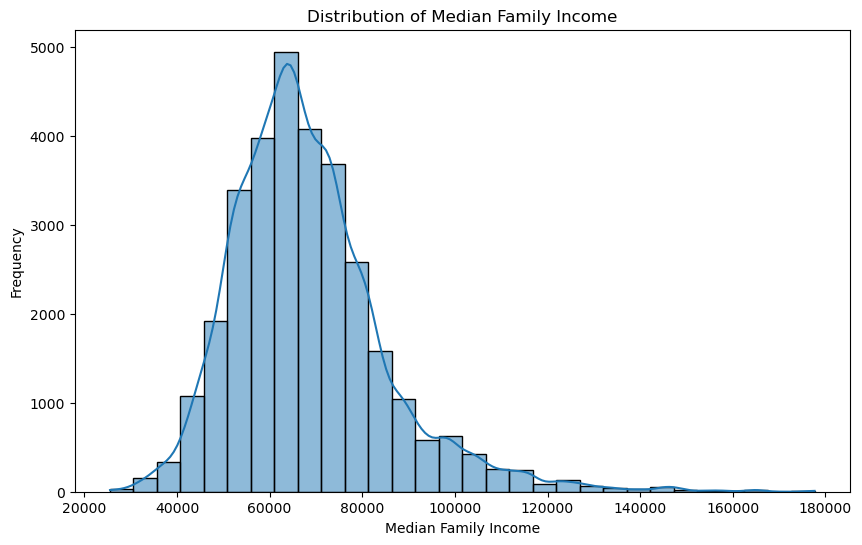

Skew :1.2688780658705154


In [934]:
# Plotting a histogram with a KDE curve
plt.figure(figsize=(10, 6))
sns.histplot(data['median_family_income'], kde=True, bins=30)

# Adding labels and title
plt.title('Distribution of Median Family Income')
plt.xlabel('Median Family Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()
print(f"Skew :{data['median_family_income'].skew()}")

In [935]:
data['median_family_income'] = data['median_family_income'].fillna(med) #filling null values with median

### Data Analysis And Visualization

In [948]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_income_vs_cost_difference(data):
    """
    Plots the top 10 counties with the largest difference between median family income 
    and total cost.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing 'county', 'median_family_income', and 'total_cost' columns.

    Returns:
    None: Displays a vertical bar plot.
    """
    # Create color palette
    colors = sns.color_palette("Set2", 10)

    # Group, aggregate, and plot
    plt.figure(figsize=(12, 8))
    data.groupby('county')[['median_family_income', 'total_cost']].agg({
        'median_family_income': lambda x: np.mean(x) ,
        'total_cost': lambda x: np.mean(x)
    }).assign(
        difference=lambda x: x.total_cost - x.median_family_income
    ).nlargest(10, 'difference').plot(
        kind='bar',
        figsize=(12, 8),
        color=colors,
        edgecolor='black',
        linewidth=1.2,
        legend=True
    )
    
    # Customize plot
    plt.title('Difference between Median Family Income vs Total Cost', fontsize=16, weight='bold')
    plt.ylabel('Amount', fontsize=12)
    plt.xlabel('Top 10 Countries', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.xticks(rotation=45, ha='right')
    plt.show()


<Figure size 1200x800 with 0 Axes>

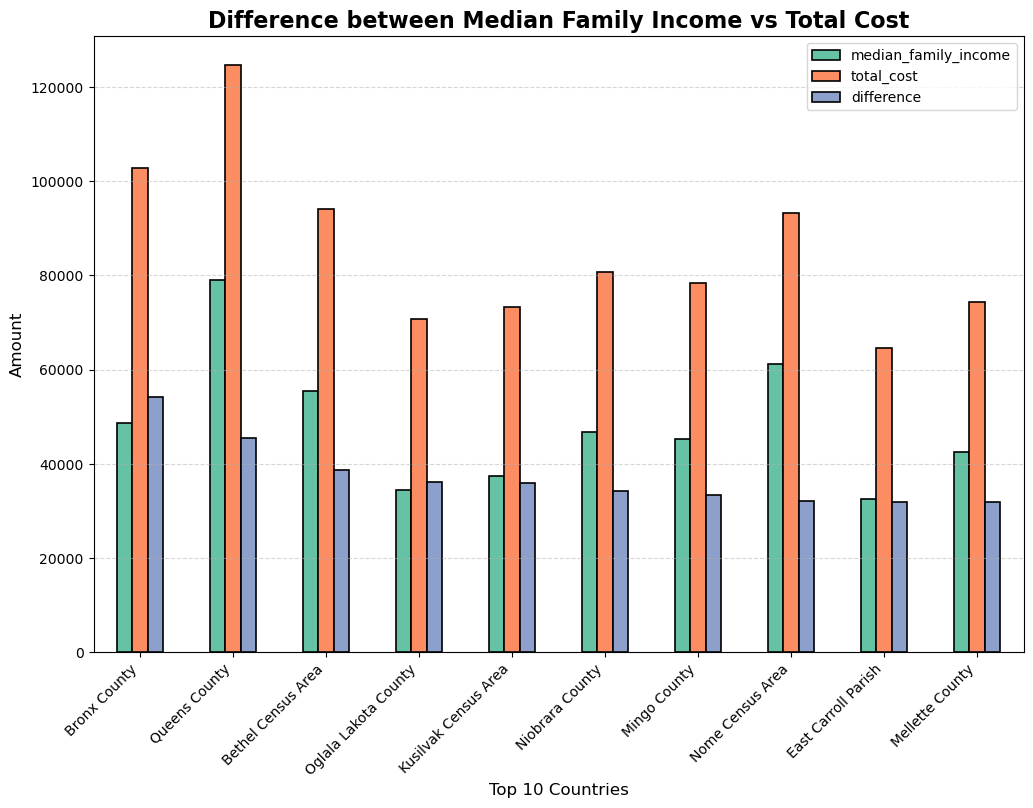

In [949]:
plot_income_vs_cost_difference(data)

#### Box Plot ---{Finding outliers}

In [951]:
def plot_boxplot(data):
    """
    This function creates a boxplot for all numerical columns in the dataset.
    
    Parameters:
    data (pd.DataFrame): The dataset containing numerical columns.
    
    It will display a single boxplot with all numerical features on the same plot.
    """
    # Select all numerical columns from the dataset
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    
    # Create a boxplot for all numerical columns in one plot
    plt.figure(figsize=(12, 8))
    
    # Melt the data to create a long-format DataFrame suitable for seaborn
    melted_data = data[numerical_columns].melt(var_name='Features', value_name='Values')
    
    # Create the boxplot
    sns.boxplot(x='Features', y='Values', data=melted_data, palette='Set2', hue='Features')

    # Add title and labels
    plt.title('Boxplot for All Numerical Columns')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust the layout to avoid clipping
    plt.show()




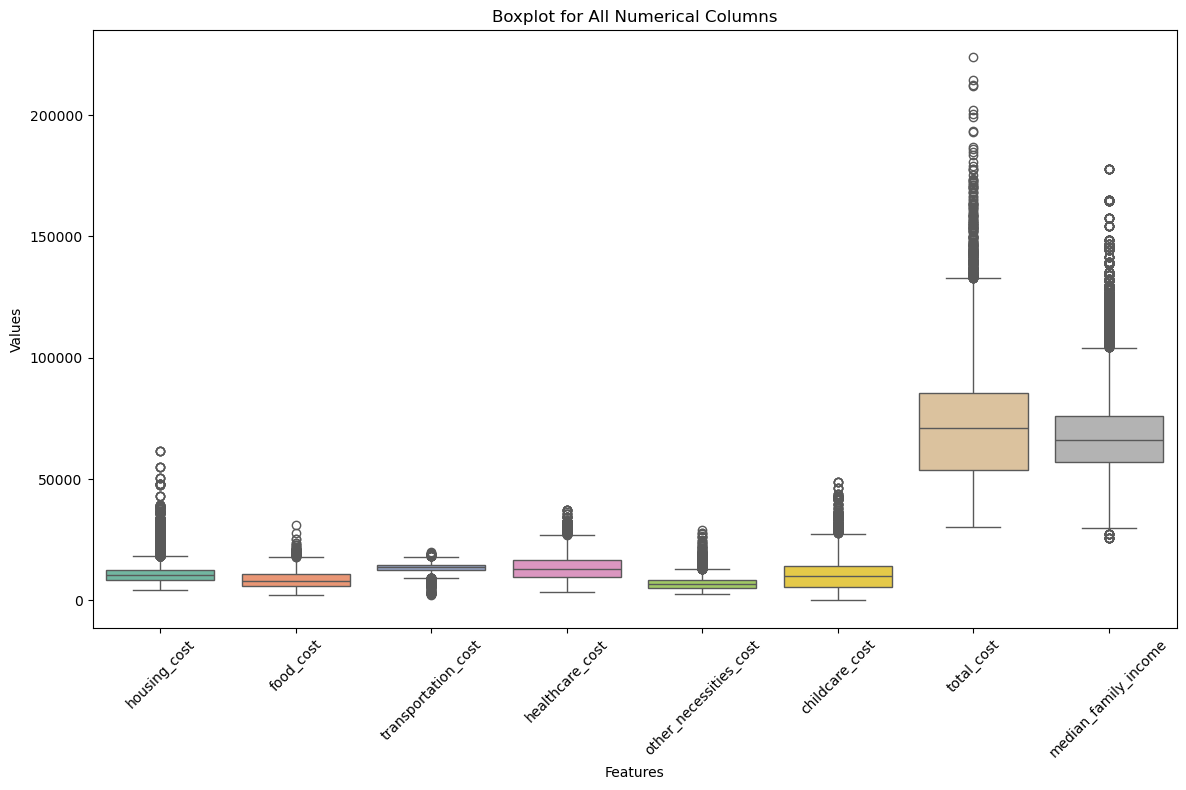

In [952]:
# Call the function
plot_boxplot(data)

#### Scatter Plot/Line Plot

In [954]:
def plot_scatter(data, x_col='family_member_count', y_col='total_cost',figsize=(10, 6)):
    """
    Plots a scatter plot based on the specified columns from the dataset.

    Parameters:
    data (DataFrame): The dataset containing the data to be plotted.
    x_col (str): The name of the column to be plotted on the x-axis. Default is 'family_member_count'.
    y_col (str): The name of the column to be plotted on the y-axis. Default is 'total_cost'.
    palette (str): The color palette to be used for the plot. Default is 'viridis'.
    
    Returns:
    None
    """
     # Set the figure size
    plt.figure(figsize=figsize)
    
    # Create the scatter plot
    sns.scatterplot(x=x_col, y=y_col, data=data)
     # Calculate the average total_cost for each family_member_count
    averages = data.groupby(x_col)[y_col].mean().reset_index()

    # Plot the average line (using a line plot)
    sns.lineplot(x=averages[x_col], y=averages[y_col], color='red', label='Average Line')

    
    # Adding a title to the plot
    plt.title(f"Scatter plot Based on {x_col} and {y_col}")
    plt.savefig('Scatter_plot.png')
    # Display the plot
    plt.show()

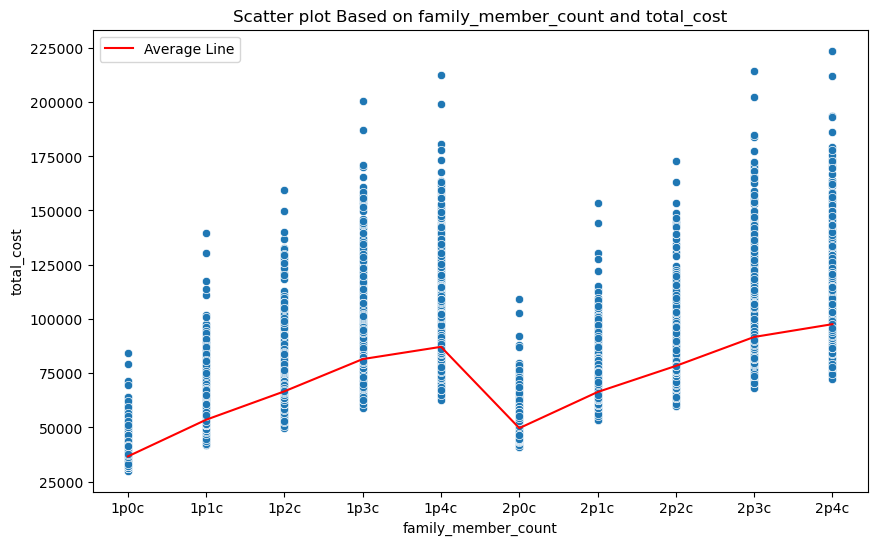

In [957]:
# Function call
plot_scatter(data)

#### Observation:

In summary, while family size appears to correlate with total cost (with larger families generally spending more), 
there is significant variability within each family size category. This suggests that factors beyond family size 
(such as income, location, and personal choices) have a major impact on the total cost of living. 
The presence of "outliers" further complicates the analysis and indicates that a few families have atypical expenses compared to the majority.

In [959]:
# Convert family_member_count to family_size
def convert_to_family_size(family_member_count):
    # Split by 'p' and 'c' to separate parents and children
    parts = family_member_count.split('p')
    parents = int(parts[0])  # Number of parents
    children = int(parts[1][:-1])  # Number of children (removing the 'c' at the end)
    
    # Total family size is the sum of parents and children
    return parents + children

# Apply the function to convert family_member_count to family_size
data['family_size'] = data['family_member_count'].apply(convert_to_family_size)

In [960]:
data[["family_member_count","family_size"]].head()

family_member_count  family_size
0                1p0c            1
1                1p1c            2
2                1p2c            3
3                1p3c            4
4                1p4c            5

In [961]:
def plot_family_expenses(data):
    """
    Generates scatter plots of various family expenses against the total cost, grouped by family size.
    
    Parameters:
    data (DataFrame): A pandas DataFrame containing 'total_cost', 'family_size', and expense-related columns.
    """
    cols = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost',
            'childcare_cost', 'median_family_income']
    titles = {
        'housing_cost': 'Housing Cost vs Total Cost by Family Size',
        'food_cost': 'Food Cost vs Total Cost by Family Size',
        'transportation_cost': 'Transportation Cost vs Total Cost by Family Size',
        'healthcare_cost': 'Healthcare Cost vs Total Cost by Family Size',
        'childcare_cost': 'Childcare Cost vs Total Cost by Family Size',
        'median_family_income': 'Median Family Income vs Total Cost by Family Size'
    }
    
    for i in cols:
        fig, ax = plt.subplots(figsize=(8, 4))
        sns.scatterplot(data=data, x="total_cost", y=i, hue="family_size", palette="Set1")
        plt.title(titles[i], fontsize=18)
        plt.show()


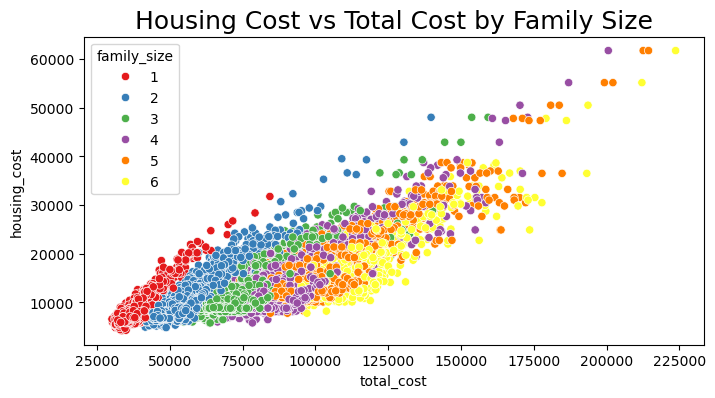

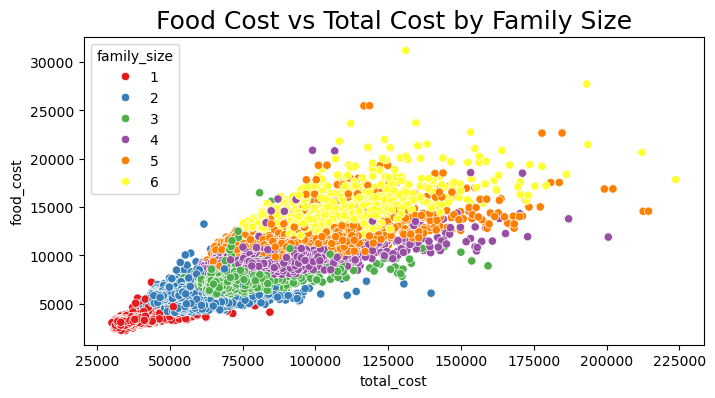

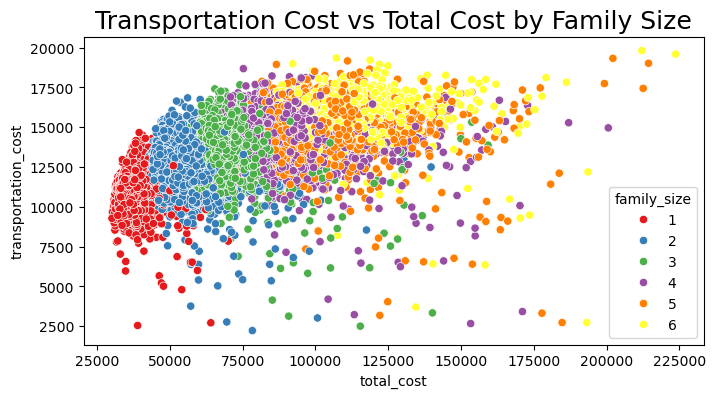

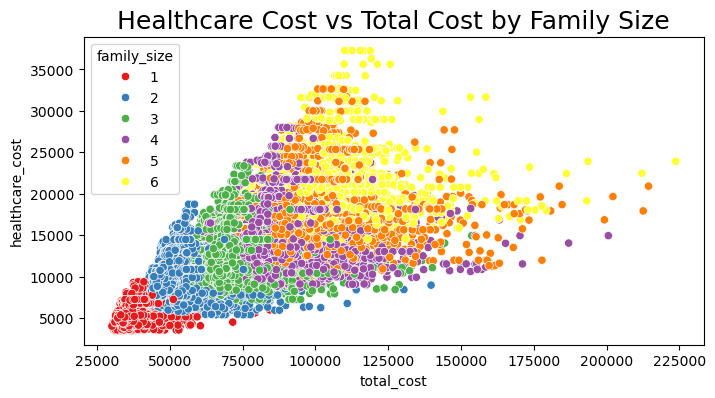

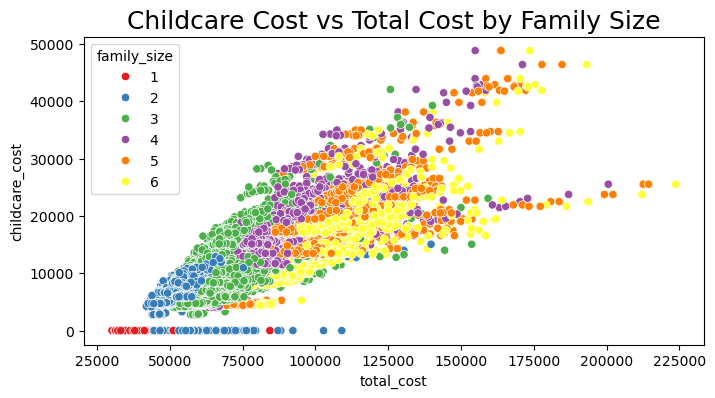

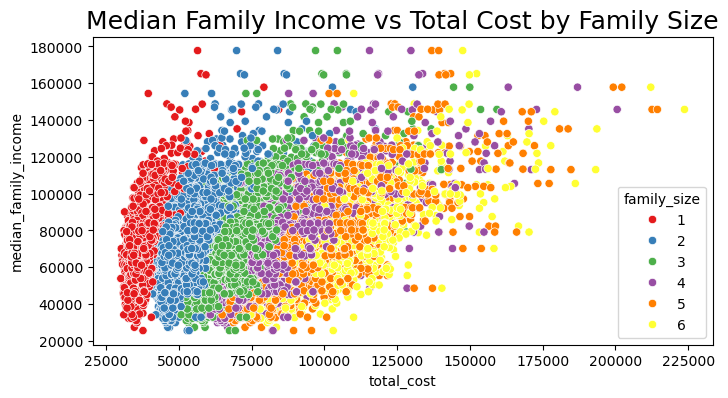

In [962]:
# Function call
plot_family_expenses(data)

In [963]:
data.drop(columns=['family_member_count'], inplace=True) # dropping column "family_member_count"

In [964]:
data.shape

(31430, 11)

In [965]:
data.corr(numeric_only=True) # Displaying Relationships between Numerical features 

isMetro  housing_cost  food_cost  \
isMetro                 1.000000e+00      0.367349   0.048483   
housing_cost            3.673492e-01      1.000000   0.577021   
food_cost               4.848308e-02      0.577021   1.000000   
transportation_cost    -1.012422e-01      0.253291   0.698019   
healthcare_cost        -7.832597e-02      0.299124   0.814550   
other_necessities_cost  2.552451e-01      0.914854   0.857673   
childcare_cost          2.202737e-01      0.644778   0.713018   
total_cost              1.969716e-01      0.784998   0.894176   
median_family_income    4.221863e-01      0.584752   0.125043   
family_size             1.965211e-16      0.476137   0.950995   

                        transportation_cost  healthcare_cost  \
isMetro                           -0.101242        -0.078326   
housing_cost                       0.253291         0.299124   
food_cost                          0.698019         0.814550   
transportation_cost                1.000000         0.689419   
healthcare_cost                    0.689419         1.000000   
other_necessities_cost             0.504562         0.591030   
childcare_cost                     0.455550         0.526584   
total_cost                         0.634592         0.748550   
median_family_income               0.077730        -0.070999   
family_size                        0.699547         0.853898   

                        other_necessities_cost  childcare_cost  total_cost  \
isMetro                               0.255245        0.220274    0.196972   
housing_cost                          0.914854        0.644778    0.784998   
food_cost                             0.857673        0.713018    0.894176   
transportation_cost                   0.504562        0.455550    0.634592   
healthcare_cost                       0.591030        0.526584    0.748550   
other_necessities_cost                1.000000        0.758449    0.936292   
childcare_cost                        0.758449        1.000000    0.880401   
total_cost                            0.936292        0.880401    1.000000   
median_family_income                  0.429968        0.286355    0.337097   
family_size                           0.769930        0.728008    0.852333   

                        median_family_income   family_size  
isMetro                         4.221863e-01  1.965211e-16  
housing_cost                    5.847520e-01  4.761369e-01  
food_cost                       1.250435e-01  9.509946e-01  
transportation_cost             7.773008e-02  6.995475e-01  
healthcare_cost                -7.099854e-02  8.538985e-01  
other_necessities_cost          4.299683e-01  7.699302e-01  
childcare_cost                  2.863545e-01  7.280084e-01  
total_cost                      3.370968e-01  8.523327e-01  
median_family_income            1.000000e+00 -2.056694e-16  
family_size                    -2.056694e-16  1.000000e+00

#### Corner Plot

In [967]:
def corner_plot(data, features):
    """
    This function generates a corner plot for a set of numerical features from the dataset.
    
    Parameters:
    data (pd.DataFrame): The input dataframe containing the dataset with numerical columns.
    features (list): List of column names to plot in the corner plot.
    
    Returns:
    None: Displays the corner plot for the specified features in the dataset.
    """
    
    # Generate the corner plot
    corner.corner(data[features], labels=features, show_titles=True, title_kwargs={'fontsize': 12})
    plt.suptitle("Corner Plot for Selected Features", y=1.02, fontsize=16)
    plt.show()


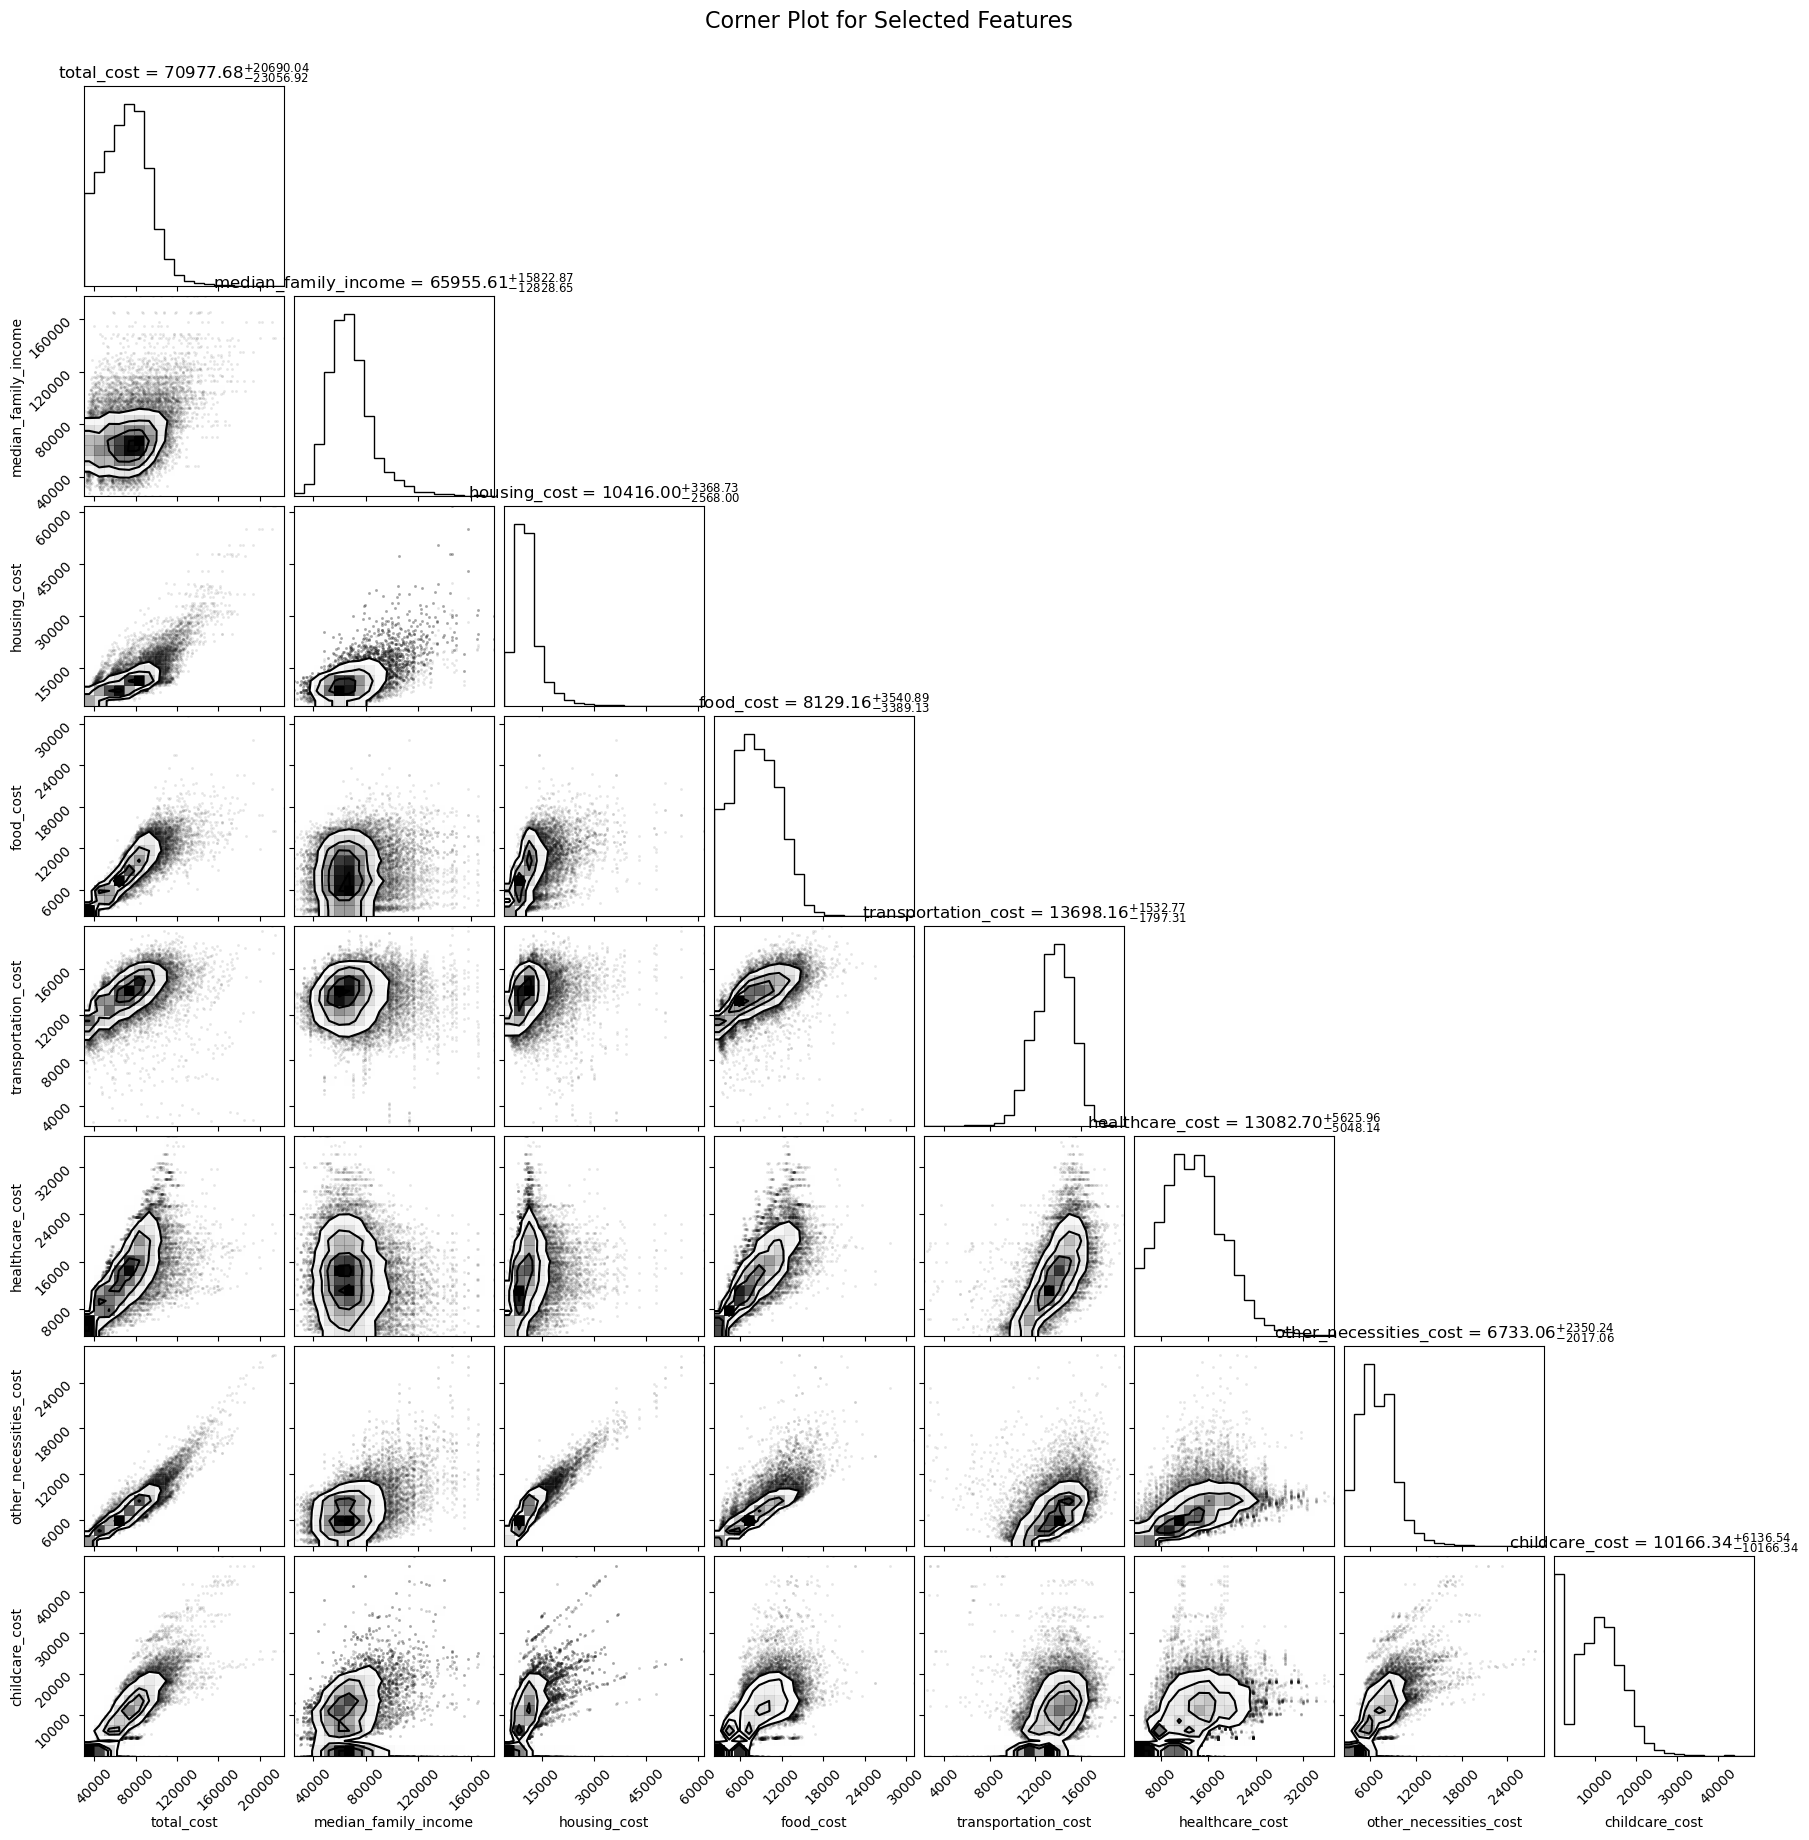

In [968]:
numeric_columns = ['total_cost', 'median_family_income', 'housing_cost', 'food_cost', 'transportation_cost','healthcare_cost','other_necessities_cost','childcare_cost']
corner_plot(data, numeric_columns)

#### Observations

Total Cost has strong correlations with most of the costs, including food cost, childcare cost, housing cost, and other necessities cost.
Income is somewhat positively correlated with housing and necessities costs but has relatively weak correlations with the other costs.
The costs like food, transportation, and healthcare exhibit strong positive correlations, suggesting that these are closely linked in the dataset.

#### Pie Chart

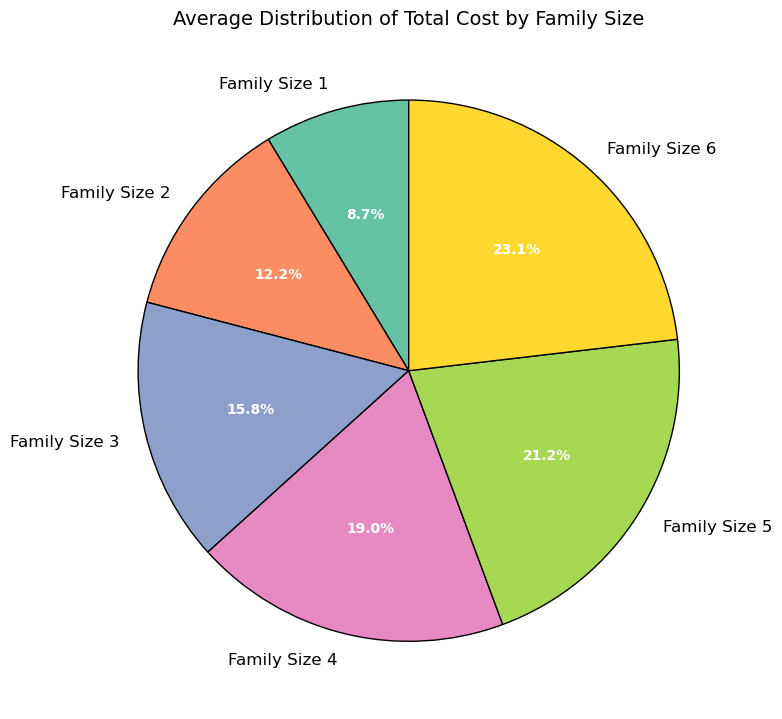

In [971]:
def plot_pie_chart_based_on_average(data):
    """
    This function creates a pie chart to show the average distribution of all costs based on family size.
    
    Parameters:
    data (pd.DataFrame): The dataset containing family size and cost-related columns.
    
    It will display a pie chart with the average distribution of costs represented for different family sizes.
    """
    # List of all cost-related columns to include in the pie chart
    cost_columns = [
        'housing_cost', 'food_cost', 'transportation_cost',
        'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'total_cost'
    ]
    
    # Calculate the average costs for each family size
    average_costs = data.groupby('family_size')[cost_columns].mean()
    
    # For this example, we will create the pie chart for the average 'total_cost' across family sizes
    plt.figure(figsize=(8, 8))
    
    # Use the average 'total_cost' across family sizes for the pie chart
    wedges, texts, autotexts = plt.pie(
        average_costs['total_cost'],  # Using the 'total_cost' column for the pie chart
        labels=[f'Family Size {int(f)}' for f in average_costs.index],  # Label each family size
        autopct='%1.1f%%',  # Display percentage in each slice
        startangle=90,  # Start the chart from the top
        colors=plt.get_cmap('Set2').colors,  # Color palette
        wedgeprops={'edgecolor': 'black'},  # Add black edge around each wedge
        textprops={'fontsize': 12}  # Customize font size for the labels
    )
    
    # Customize the appearance of the chart
    plt.title('Average Distribution of Total Cost by Family Size', fontsize=14)
    plt.setp(autotexts, size=10, weight="bold", color="white")  # Make the percentage text white and bold
    plt.ylabel('')  # Remove y-label for better visualization
    plt.tight_layout()  # Adjust the layout to avoid clipping
    plt.show()

# Call the function with your dataset
plot_pie_chart_based_on_average(data)


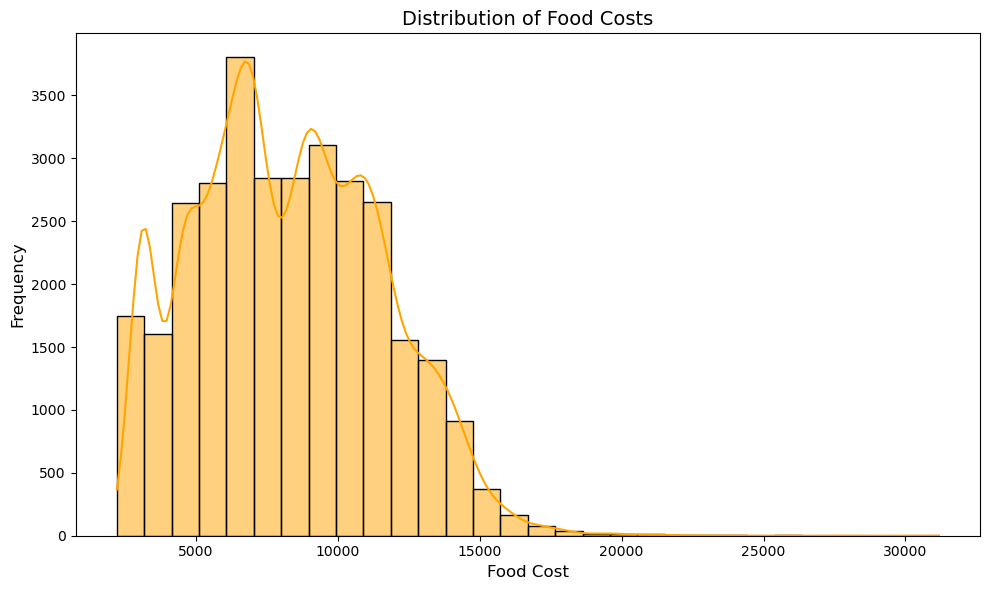

In [972]:
def plot_food_cost_distribution(data):
    """
    This function creates a histogram to show the distribution of food costs across the dataset.
    
    Parameters:
    data (pd.DataFrame): The dataset containing the food_cost column.
    
    It will display a histogram showing the distribution of food costs.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data['food_cost'], bins=30, kde=True, color='orange', edgecolor='black')
    plt.title('Distribution of Food Costs', fontsize=14)
    plt.xlabel('Food Cost', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

#  function call
plot_food_cost_distribution(data)


C:\Users\Shiri\AppData\Local\Temp\ipykernel_24672\3248347377.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='family_size', y='childcare_cost', data=data, palette='coolwarm')


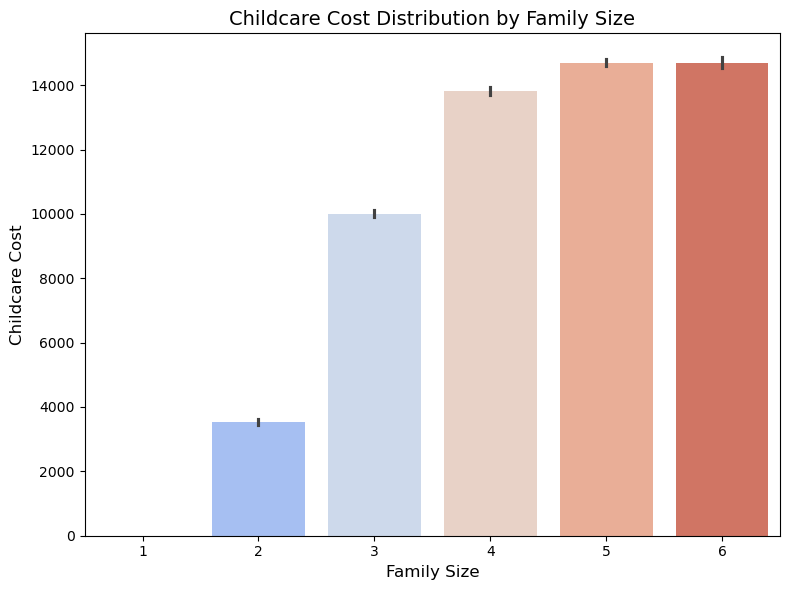

In [973]:
def plot_childcare_cost_vs_family_size(data):
    """
    This function creates a box plot to show how childcare costs vary by family size.
    
    Parameters:
    data (pd.DataFrame): The dataset containing family size and childcare cost columns.
    
    It will display a box plot showing the distribution of childcare costs for different family sizes.
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x='family_size', y='childcare_cost', data=data, palette='coolwarm')
    plt.title('Childcare Cost Distribution by Family Size', fontsize=14)
    plt.xlabel('Family Size', fontsize=12)
    plt.ylabel('Childcare Cost', fontsize=12)
    plt.tight_layout()
    plt.show()

#  function call
plot_childcare_cost_vs_family_size(data)


In [974]:
correlation = data['childcare_cost'].corr(data['family_size'])
print("Correlation between childcare cost and family size: ", correlation)


Correlation between childcare cost and family size:  0.7280083835319171


#Observations:                                                                                                             
Trend: From the bar plot, you would expect to see that childcare costs tend to rise as family size increases.
The average childcare cost for families with more children should be higher.                                                                             
Variability: If the bars are fairly even in height across family sizes,
it could indicate that childcare costs don’t vary much with family size, which would be surprising.
However, usually, larger families incur more childcare costs.

### Converting Categorical columns into numerical (One_hot Encoding)

In [977]:
# Identify categorical columns
categorical_cols = ["isMetro","county"]

# Apply get_dummies to all categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int, drop_first=True)

## CLUSTERING (K - Means Algorithm)

### Model-1--considering complete data

In [981]:
#normalize data

In [982]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_encoded)

In [983]:
def apply_pca(data, n_components=2):
    """
    Applies PCA to the given scaled dataset and returns a DataFrame with principal components.

    Parameters:
    - data (pd.DataFrame): Scaled data to apply PCA on.
    - n_components (int): Number of principal components to retain (default is 2).

    Returns:
    - pd.DataFrame: DataFrame containing principal components.
    """
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data)
    
    # Create DataFrame for principal components
    pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])
    
    # Explained variance ratio
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    return pca_df



In [984]:
pca_df = apply_pca(scaled_data, n_components=2)

Explained Variance Ratio: [0.16848048 0.10631239]


In [985]:
def one_silhoutte_inertia(n, xy):
    """
    Calculates the silhoutte score and WCSS for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_

    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [986]:
def find_best_clusters(data, min_clusters=2, max_clusters=10):
    """
    Finds the best number of clusters based on silhouette score.

    Parameters:
    - data (pd.DataFrame or np.array): Scaled data for clustering.
    - min_clusters (int): Minimum number of clusters to try (default is 2).
    - max_clusters (int): Maximum number of clusters to try (default is 10).

    Returns:
    - int: Best number of clusters.
    - list: WCSS (within-cluster sum of squares) for each cluster count.
    """
    wcss = []
    best_n, best_score = None, -np.inf

    for n in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(data)
        inertia = kmeans.inertia_
        score = silhouette_score(data, labels)
        
        wcss.append(inertia)
        
        if score > best_score:
            best_n = n
            best_score = score
        
        print(f"{n:2g} clusters silhouette score = {score:0.2f}")
    
    print(f"Best number of clusters = {best_n:2g}")
    
    return best_n, wcss

In [987]:
best_n, wcss = find_best_clusters(pca_result, min_clusters=2, max_clusters=10)

 2 clusters silhouette score = 0.61
 3 clusters silhouette score = 0.60
 4 clusters silhouette score = 0.63
 5 clusters silhouette score = 0.61
 6 clusters silhouette score = 0.58
 7 clusters silhouette score = 0.57
 8 clusters silhouette score = 0.64
 9 clusters silhouette score = 0.69
10 clusters silhouette score = 0.68
Best number of clusters =  9


In [988]:
def plot_elbow_method(data, k_range=range(1, 11)):
    """
    Plots the Elbow Method to find the optimal number of clusters.

    Parameters:
    - data (pd.DataFrame or np.array): Scaled data for clustering.
    - k_range (range): Range of K values to try (default is from 1 to 10).

    Returns:
    - None: Displays the elbow plot.
    """
    inertia = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plotting
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()


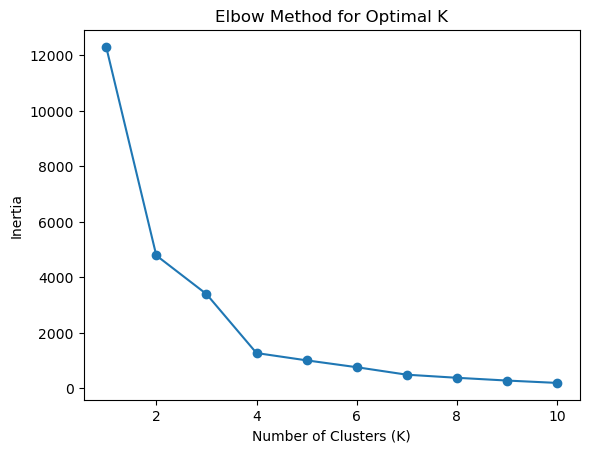

In [989]:
plot_elbow_method(pca_result, k_range=range(1, 11))

<Axes: xlabel='PC1', ylabel='PC2'>

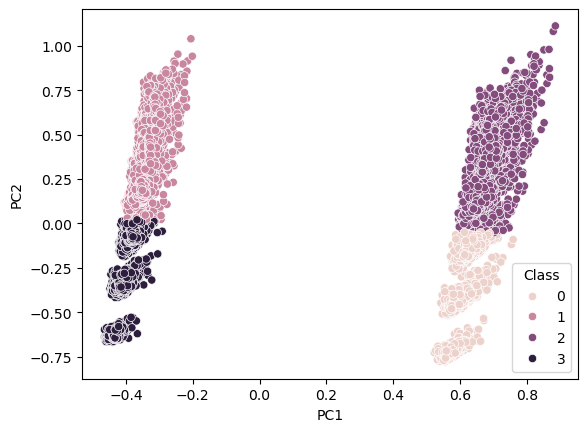

In [992]:
kmeans= KMeans(4, random_state=42)#random_state is used to fix the centroids
kmeans.fit(pca_result)
pca_df["Class"]=kmeans.labels_
sns.scatterplot(data=pca_df,x='PC1',y = 'PC2',hue="Class")

In [993]:
# Considering only Rows which are top 30 contries as data is large and nosiy

In [994]:
# List of top 30 counties
top_30_counties = [
    'Washington County', 'Jefferson County', 'Franklin County', 'Lincoln County', 'Jackson County',
    'Madison County', 'Montgomery County', 'Clay County', 'Union County', 'Monroe County',
    'Marion County', 'Wayne County', 'Grant County', 'Warren County', 'Greene County',
    'Carroll County', 'Douglas County', 'Lake County', 'Johnson County', 'Adams County',
    'Marshall County', 'Polk County', 'Clark County', 'Lee County', 'Crawford County',
    'Fayette County', 'Scott County', 'Morgan County', 'Calhoun County', 'Lawrence County'
]

# Filter dataset (assuming your original DataFrame is called 'df')
filtered_df = data[data['county'].isin(top_30_counties)]

# Display the filtered DataFrame
print(filtered_df)

# Optional: Reset index if needed
filtered_df = filtered_df.reset_index(drop=True)


       isMetro          county  housing_cost    food_cost  \
70        True  Calhoun County        5784.0   3091.78752   
71        True  Calhoun County        8676.0   4556.54328   
72        True  Calhoun County        8676.0   6676.09716   
73        True  Calhoun County       11328.0   8906.20824   
74        True  Calhoun County       11328.0  10901.80080   
...        ...             ...           ...          ...   
31315    False  Lincoln County        7548.0   5649.25632   
31316    False  Lincoln County        9948.0   7031.06832   
31317    False  Lincoln County        9948.0   8904.69648   
31318    False  Lincoln County       12816.0  10871.95824   
31319    False  Lincoln County       12816.0  13304.67000   

       transportation_cost  healthcare_cost  other_necessities_cost  \
70             10394.19504       5497.47984              3216.04764   
71             11066.93484       8300.30712              4794.67200   
72             11810.26248      11103.13476           

In [995]:
filtered_df.shape

(4640, 11)

In [996]:
# Identify categorical columns
categorical_cols = ["isMetro","county"]

# Apply get_dummies to all categorical columns
data_encoded2 = pd.get_dummies(filtered_df, columns=categorical_cols, dtype=int, drop_first=True)

#### Model 2 --Considering top 30 Countries

In [998]:
# df1 = data_encoded[['median_family_income','total_cost', 'family_size','isMetro_True']].copy()
scaled_data2 = scaler.fit_transform(data_encoded2)

In [999]:
pca_df = apply_pca(scaled_data2, n_components=2)

Explained Variance Ratio: [0.17559301 0.14572443]


In [1000]:
best_n, wcss = find_best_clusters(pca_result, min_clusters=2, max_clusters=10)

 2 clusters silhouette score = 0.61
 3 clusters silhouette score = 0.60
 4 clusters silhouette score = 0.63
 5 clusters silhouette score = 0.61
 6 clusters silhouette score = 0.58
 7 clusters silhouette score = 0.57
 8 clusters silhouette score = 0.64
 9 clusters silhouette score = 0.69
10 clusters silhouette score = 0.68
Best number of clusters =  9


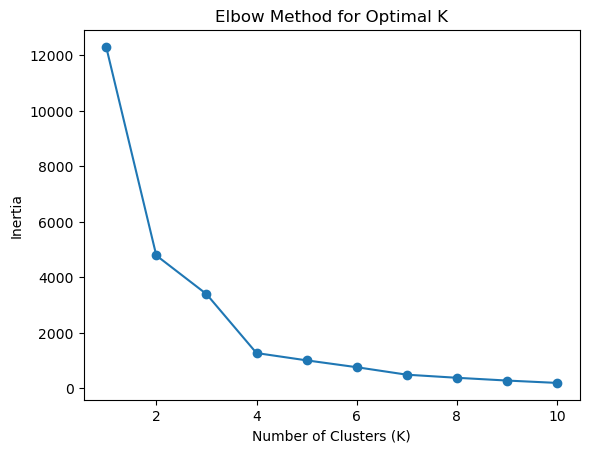

In [1001]:
plot_elbow_method(pca_result, k_range=range(1, 11))

#### Model3 -- final model
I  want to focus on the following features for clustering:

total_cost (captures overall expenditure)                                                                                  
housing_cost (directly affects financial well-being)                                                                                 
food_cost (critical part of family expenditure)                                                                          
childcare_cost (influenced by family size and affects total cost)                                                               
family_size (important categorical feature for segmentation) 
isMetro_True (plays important role)

#### Normalising the data --(MinMaxScaler)

In [1237]:
df3 = data_encoded[['childcare_cost','housing_cost','food_cost','family_size','family_size',"isMetro_True"]].copy()
scaled_data3 = scaler.fit_transform(df3)
data_min = scaler.data_min_
data_max = scaler.data_max_


In [1239]:
pca_df = apply_pca(scaled_data3, n_components=3)

Explained Variance Ratio: [0.52358799 0.44988748 0.01854287]


In [1007]:
best_n, wcss = find_best_clusters(pca_result, min_clusters=2, max_clusters=10)

 2 clusters silhouette score = 0.61
 3 clusters silhouette score = 0.60
 4 clusters silhouette score = 0.63
 5 clusters silhouette score = 0.61
 6 clusters silhouette score = 0.58
 7 clusters silhouette score = 0.57
 8 clusters silhouette score = 0.64
 9 clusters silhouette score = 0.69
10 clusters silhouette score = 0.68
Best number of clusters =  9


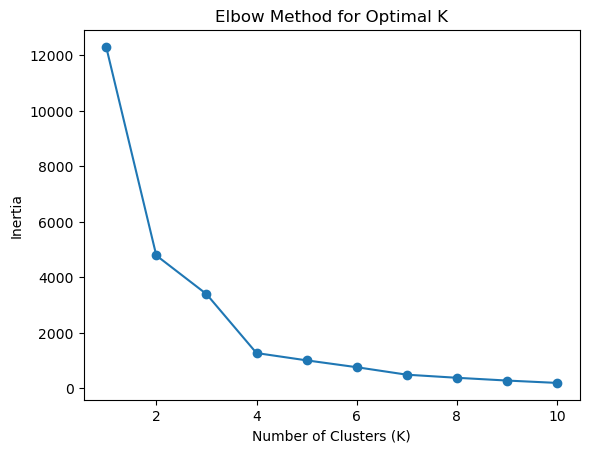

In [1008]:
plot_elbow_method(pca_result, k_range=range(1, 11))

In [1009]:
def perform_clustering(data, n_clusters=4, random_state=42):
    """
    Performs K-Means clustering on the given dataset and returns the labels and centroids.

    Parameters:
    data (pd.DataFrame or np.ndarray): The input dataset to perform clustering on.
    n_clusters (int): The number of clusters to form (default is 4).
    random_state (int): The seed for random number generation (default is 42).

    Returns:
    tuple: A tuple containing the cluster labels and the cluster centroids.
           - labels (np.ndarray): An array of cluster labels for each data point.
           - centroids (np.ndarray): The coordinates of the cluster centroids.
    """
    # Create the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Return the labels and centroids
    return kmeans.labels_, kmeans.cluster_centers_


In [1010]:
perform_clustering(pca_result, n_clusters=4, random_state=42)

(array([0, 0, 0, ..., 1, 1, 1]),
 array([[ 0.59613502, -0.39003013],
        [-0.34467781,  0.34865342],
        [ 0.66985813,  0.29534644],
        [-0.40737384, -0.30520105]]))

In [1011]:
# Assign cluster labels to the DataFrame
pca_df["Class"] = kmeans.labels_

In [1012]:
def plot_pca_clusters(data,x,y, palette="Set2"):
    """
    Plots a scatter plot of PCA results with clusters colored differently and centroids marked.

    Parameters:
    pca_df (pd.DataFrame): A DataFrame containing the PCA components ('PC1', 'PC2') and the cluster labels ('Class').
    kmeans (KMeans): The fitted KMeans model used to generate cluster labels and centroids.
    palette (str, optional): The color palette for the clusters. Default is "Set2". 
                             Other options can include "viridis", "coolwarm", "tab10", etc.

    Returns:
    None: Displays a scatter plot of the PCA components with clusters color-coded and centroids marked.
    """
    # Create a scatter plot with a custom color palette
    plt.figure(figsize=(12, 14))
    sns.scatterplot(data=data, x=x, y=y, hue="Class", palette=palette, s=100, legend='full')

    # Mark the centroids
    centroids = kmeans.cluster_centers_  # Get the centroids (cluster centers)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

    # Add a title and labels
    plt.title('PCA: Clusters Visualization with Centroids', fontsize=16)
    plt.xlabel('PC1', fontsize=12)
    plt.ylabel('PC2', fontsize=12)

    # Show the legend
    plt.legend(title="Clusters", loc="upper right")

    # Show the plot
    plt.show()


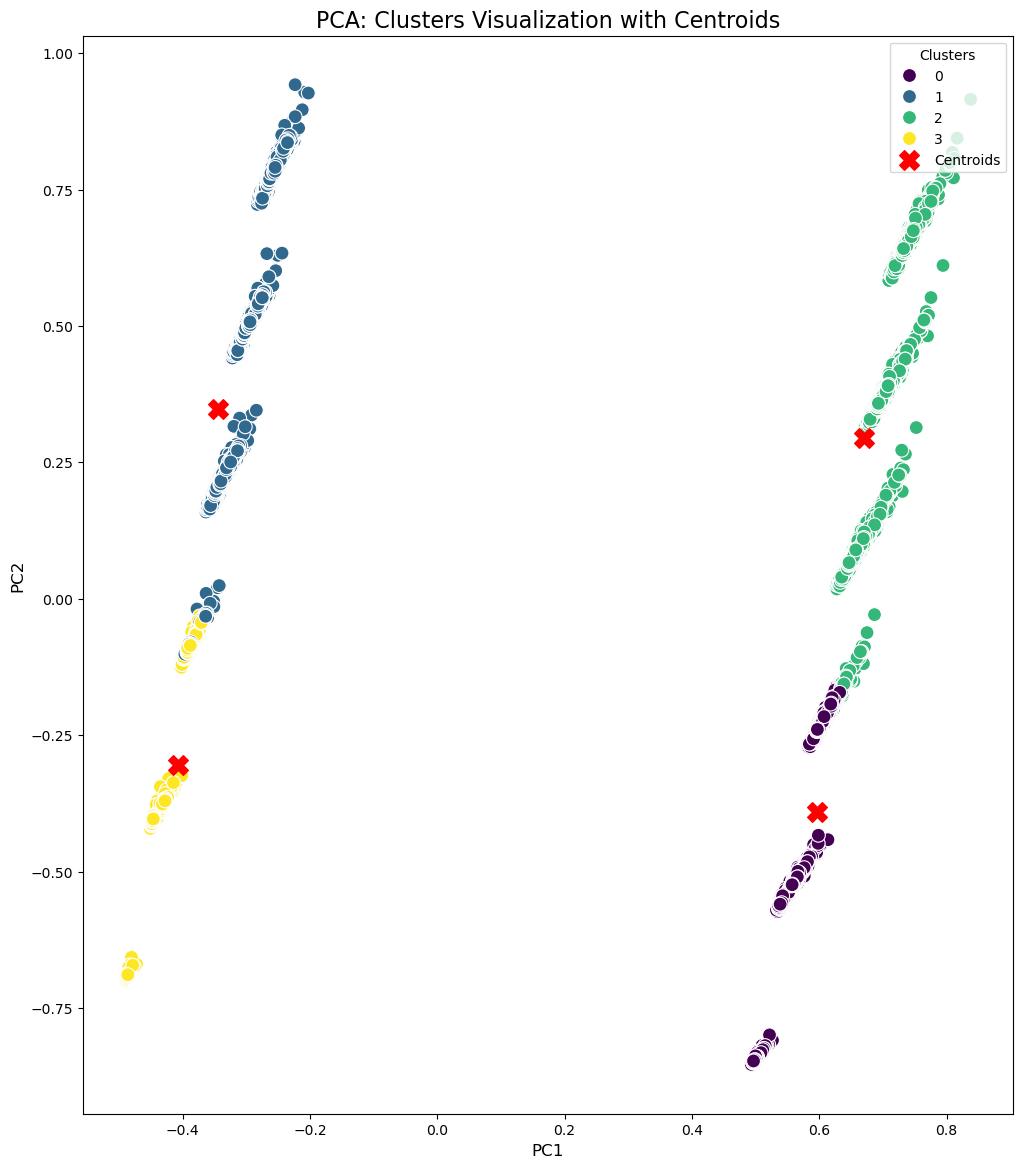

In [1013]:
plot_pca_clusters(pca_df,'PC1','PC2', palette="viridis")

In [1015]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_pca_clusters_3d(data, x, y, z, kmeans):
    """
    Plots a 3D scatter plot of PCA results with clusters colored differently and centroids marked.

    Parameters:
    pca_df (pd.DataFrame): A DataFrame containing the PCA components ('PC1', 'PC2', 'PC3') and the cluster labels ('Class').
    kmeans (KMeans): The fitted KMeans model used to generate cluster labels and centroids.

    Returns:
    None: Displays a 3D scatter plot of the PCA components with clusters color-coded and centroids marked.
    """

    # Ensure all columns are 1D arrays
    x_data = data[x].values.flatten()  # Flatten if needed
    y_data = data[y].values.flatten()  # Flatten if needed
    z_data = data[z].values.flatten()  # Flatten if needed
    class_data = data['Class'].values.flatten()  # Flatten 'Class' to 1D

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 14))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for PCA components, colored by Class
    scatter = ax.scatter(x_data, y_data, z_data, c=class_data, cmap='viridis', s=100)

    # Mark the centroids
    centroids = kmeans.cluster_centers_  # Get the centroids (cluster centers)
    ax.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

    # Add labels and title
    ax.set_title('PCA: 3D Clusters Visualization with Centroids', fontsize=16)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)
    ax.set_zlabel(z, fontsize=12)

    # Add a legend
    ax.legend(title="Clusters")

    # Show the plot
    plt.show()


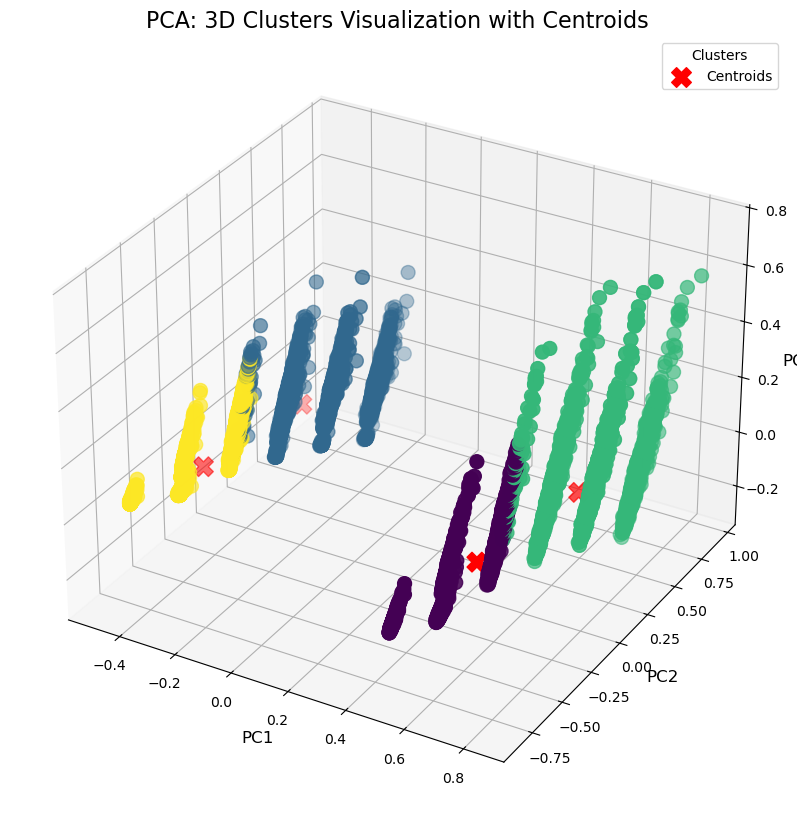

In [1016]:
plot_pca_clusters_3d(pca_df,'PC1','PC2','PC3',kmeans)


Based on the Silhouette scores for different numbers of clusters and all three models, we can conclude the following:

- The highest Silhouette score is **0.63** for **4 clusters**, which shows that the clustering quality is good with 4 clusters.
- As the number of clusters increases from 2 to 10, the Silhouette score generally decreases, but increases again at 8 and 9 clusters. This suggests that adding more clusters may not necessarily improve the clustering quality.
- Since the score of 0.63 for 4 clusters is fairly good, **4 clusters** is the best choice for this data.



C:\Users\Shiri\AppData\Local\Temp\ipykernel_24672\3806871223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=class_column, palette='viridis')


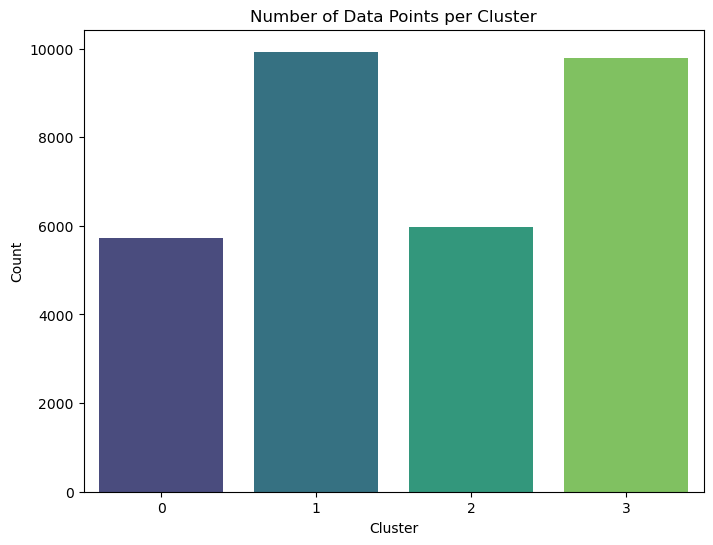

In [1018]:
def plot_cluster_counts(data, class_column='Class'):
    """Plots a bar chart of cluster counts."""
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=class_column, palette='viridis')
    plt.title('Number of Data Points per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()

plot_cluster_counts(pca_df)

#### Trying using DBScan 

In [1268]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fit_dbscan(data, eps=0.3, min_samples=4):
    """
    Applies DBSCAN clustering to the given dataset.

    Parameters:
        data (pd.DataFrame or np.ndarray): Input data to cluster, typically after PCA.
        eps (float): The maximum distance between two samples for one to be considered 
                     as in the neighborhood of the other.
        min_samples (int): The number of samples (or total weight) in a neighborhood 
                           for a point to be considered as a core point.

    Returns:
        pd.DataFrame: DataFrame with an added 'Cluster' column containing cluster labels.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    
    # Add cluster labels to the DataFrame (assuming data is a DataFrame)
    data = data.copy()
    data['Cluster'] = clusters
    
    return data




In [1272]:
# Apply DBSCAN
clustered_data = fit_dbscan(pca_df, eps=0.5, min_samples=9)


In [1273]:
valid_points = pca_df[clusters != -1]  # Exclude noise points
valid_clusters = clusters[clusters != -1]  # Exclude noise points' cluster labels

# Calculate the silhouette score
sil_score = silhouette_score(valid_points, valid_clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.6543854073451404


In [ ]:
### Not Much Differenece

### Silhoutte Plot --Model 3

In [1020]:
def plot_silhouette(kmeans, data, n_clusters):
    """
    Plots the silhouette score for each sample and displays the average silhouette score.

    Parameters:
    kmeans (KMeans): The fitted KMeans model with clustering labels.
    data (pd.DataFrame or np.array): The data used for clustering.
    n_clusters (int): The number of clusters for which to plot the silhouette.

    Returns:
    None: Displays a silhouette plot.
    """
    # Get the silhouette score for each sample
    silhouette_vals = silhouette_samples(data, kmeans.labels_)

    # Get the average silhouette score for the model
    avg_silhouette_score = silhouette_score(data, kmeans.labels_)

    # Create a silhouette plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot silhouette scores for each sample
    y_lower, y_upper = 0, 0
    for i in range(n_clusters):
        # Aggregate all the silhouette scores for samples belonging to cluster i
        cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
        cluster_silhouette_vals.sort()

        # Define y-axis for the cluster
        y_upper += len(cluster_silhouette_vals)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, cluster_silhouette_vals,
            alpha=0.7, label=f"Cluster {i+1}"
        )

        y_lower = y_upper

    ax.axvline(x=avg_silhouette_score, color="red", linestyle="--", label=f"Avg. Silhouette Score: {avg_silhouette_score:.2f}")

    # Labels and Title
    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters", fontsize=16)
    ax.set_xlabel("Silhouette Score", fontsize=12)
    ax.set_ylabel("Cluster", fontsize=12)
    ax.legend(loc="upper left")

    plt.show()


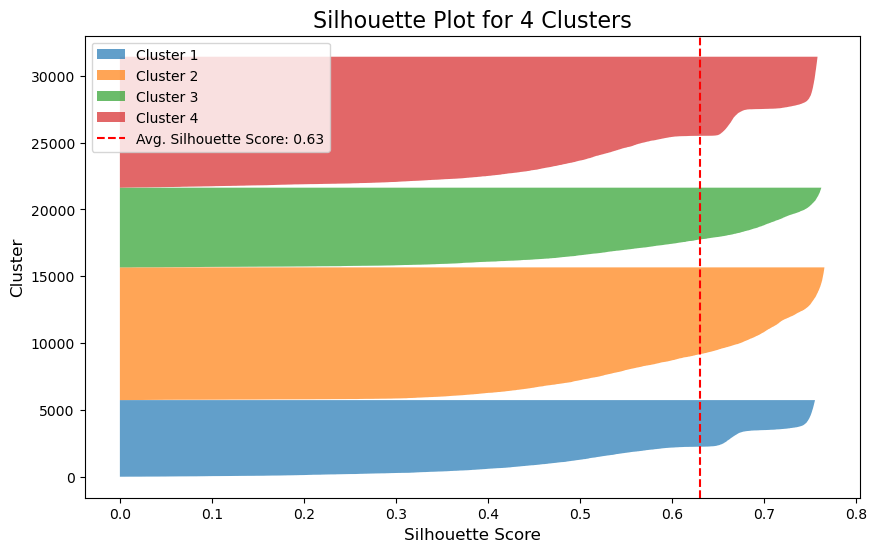

In [1021]:
#function call
plot_silhouette(kmeans, pca_result, n_clusters=4)

### why 4 Clusters?

The best number of clusters for the US Cost of Living dataset is **4**. 
This number balances simplicity with meaningful segmentation of regions.
The 4 clusters represent high, medium-high, medium-low, and low-cost areas. 
Adding more clusters offers marginal improvements but leads to unnecessary complexity and overfitting.
Thus, 4 clusters provide clear, actionable insights into the dataset without overcomplicating the analysis.

### Quality of Clusters:

The Silhouette score of 0.63 for 4 clusters is considered "fairly good," meaning that the clustering is sufficiently strong to identify meaningful groupings in the data. This implies that dividing the data into 4 clusters strikes a good balance in terms of clarity and granularity.
    
# Conclusion:
4 clusters is the best choice for segmenting the US Cost of Living dataset.

These clusters likely represent:

High-cost areas (e.g., major cities)

Medium-high-cost regions (e.g., growing urban areas)

Medium-low-cost regions (e.g., smaller cities)

Low-cost areas (e.g., rural regions)

This clustering approach offers a clear and actionable breakdown of cost of living across the United States, 
helping to highlight the varying costs in different regions, which can be valuable for businesses, policymakers,
and individuals when making decisions related to relocation, 
salary negotiation, or economic planning.
                                                                                  

In [1023]:
# Reverse the scaling manually (if you don't want to use inverse_transform)
original_data_manual = scaled_data3 * (data_max - data_min) + data_min

# Create a DataFrame if needed
original_data_manual_df = pd.DataFrame(original_data_manual, columns=df3.columns)

In [1024]:
original_data_manual_df['Class']=kmeans.labels_
original_data_manual_df

childcare_cost  housing_cost    food_cost  family_size  family_size  \
0              0.0000    8505.72876   3454.91712          1.0          1.0   
1           6147.8298   12067.50240   5091.70788          2.0          2.0   
2          15824.6940   12067.50240   7460.20308          3.0          3.0   
3          18802.1892   15257.15040   9952.23924          4.0          4.0   
4          18802.1892   15257.15040  12182.21400          5.0          5.0   
...               ...           ...          ...          ...          ...   
31425          0.0000    8316.00000   6010.65672          2.0          2.0   
31426       8675.8770   10956.00000   7480.86696          3.0          3.0   
31427      21207.6984   10956.00000   9474.35748          4.0          4.0   
31428      25063.6440   13632.00000  11567.46972          5.0          5.0   
31429      25063.6440   13632.00000  14155.81080          6.0          6.0   

       isMetro_True  Class  
0               1.0      0  
1               1.0      0  
2               1.0      0  
3               1.0      2  
4               1.0      2  
...             ...    ...  
31425           0.0      3  
31426           0.0      3  
31427           0.0      1  
31428           0.0      1  
31429           0.0      1  

[31430 rows x 7 columns]

In [1025]:
t_df=original_data_manual_df.drop(original_data_manual_df.columns[4],axis=1)

In [1026]:
t_df

childcare_cost  housing_cost    food_cost  isMetro_True  Class
0              0.0000    8505.72876   3454.91712           1.0      0
1           6147.8298   12067.50240   5091.70788           1.0      0
2          15824.6940   12067.50240   7460.20308           1.0      0
3          18802.1892   15257.15040   9952.23924           1.0      2
4          18802.1892   15257.15040  12182.21400           1.0      2
...               ...           ...          ...           ...    ...
31425          0.0000    8316.00000   6010.65672           0.0      3
31426       8675.8770   10956.00000   7480.86696           0.0      3
31427      21207.6984   10956.00000   9474.35748           0.0      1
31428      25063.6440   13632.00000  11567.46972           0.0      1
31429      25063.6440   13632.00000  14155.81080           0.0      1

[31430 rows x 5 columns]

In [1031]:
### Back Scaling

x_data shape: (31430,)
y_data shape: (31430,)
z_data shape: (31430,)
class_data shape: (31430,)


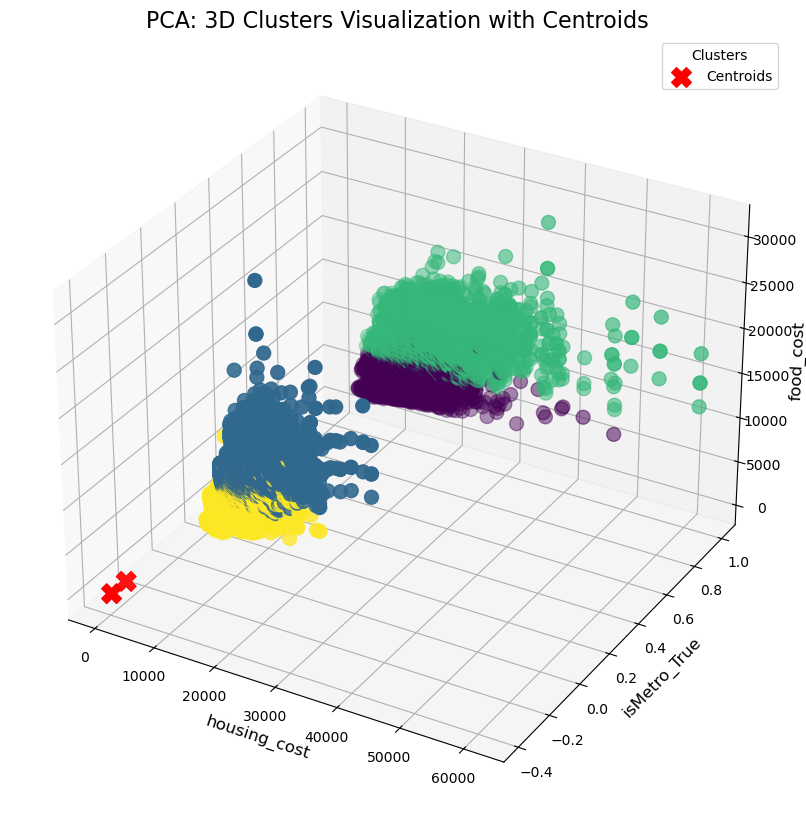

In [1032]:
def plot_clusters_3d(data, x, y, z, kmeans, class_column='Class'):
    """
    Plots a 3D scatter plot of PCA results with clusters colored differently and centroids marked.

    Parameters:
    data (pd.DataFrame): A DataFrame containing the PCA components and the cluster labels.
    x, y, z (str): The column names in data corresponding to the x, y, and z axes.
    kmeans (KMeans): The fitted KMeans model used to generate cluster labels and centroids.
    class_column (str): The column name in the data representing the cluster labels. Default is 'Class'.

    Returns:
    None: Displays a 3D scatter plot of the PCA components with clusters color-coded and centroids marked.
    """
    
    # Ensure all columns are 1D arrays and check the shapes
    x_data = data[x].values.flatten()
    y_data = data[y].values.flatten()
    z_data = data[z].values.flatten()
    class_data = data[class_column].values.flatten()

    # Debug: Print shapes of the data columns
    print(f"x_data shape: {x_data.shape}")
    print(f"y_data shape: {y_data.shape}")
    print(f"z_data shape: {z_data.shape}")
    print(f"class_data shape: {class_data.shape}")
    
    # Check if lengths of x, y, z, and Class match
    if not (x_data.shape == y_data.shape == z_data.shape == class_data.shape):
        raise ValueError("Shape mismatch: The number of rows in 'x', 'y', 'z', and 'Class' must be the same.")

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 14))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for PCA components, colored by Class
    scatter = ax.scatter(x_data, y_data, z_data, c=class_data, cmap='viridis', s=100)

    # Mark the centroids
    centroids = kmeans.cluster_centers_  # Get the centroids (cluster centers)
    ax.scatter(centroids[:, 0], centroids[:, -1], s=200, c='red', marker='X', label='Centroids')

    # Add labels and title
    ax.set_title('PCA: 3D Clusters Visualization with Centroids', fontsize=16)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel(y, fontsize=12)
    ax.set_zlabel(z, fontsize=12)

    # Add a legend
    ax.legend(title="Clusters")

    # Show the plot
    plt.show()


plot_clusters_3d(data=t_df, x='housing_cost', y='isMetro_True', z='food_cost', kmeans=kmeans, class_column='Class')


# Fitting 

In [1034]:
#### Let's fit curves to the literacy rate data for overall, males, and females across the years.

In [1035]:
from scipy.optimize import curve_fit
import scipy.stats as stats 
import scipy.optimize as opt
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [1036]:
data_fit = pd.read_csv("IndicatorsOnEducationAndLiteracyAnnual.csv")

In [1037]:
data_fit.head()
pd.set_option('display.max_columns', None)  # Show all columns


In [1038]:
data_fit.head()

DataSeries  2021  2020  2019  2018  \
0                Literacy Rate (15 Years & Over)  97.6  97.1  97.5  97.3   
1        Literacy Rate (15 Years & Over) - Males  98.9  98.5  98.9  98.9   
2      Literacy Rate (15 Years & Over) - Females  96.4  95.8  96.1  95.9   

   2017  2016  2015  2014  2013  2012  2011  2010  2009  2008  2007  2006  \
0  97.2  97.0  96.8  96.7  96.6  96.4  96.2  95.9  95.6  95.2  94.8  94.5   
1  98.8  98.7  98.6  98.6  98.5  98.5  98.4  98.0  97.9  97.7  97.6  97.4   
2  95.7  95.4  95.2  94.9  94.7  94.4  94.1  93.8  93.3  92.7  92.1  91.6   

   2005  2004  2003  2002  2001  2000  1999  1998  1997  1996  1995  1994  \
0  94.1  93.8  93.5  93.2  92.9  92.5  92.3  91.9  91.5  91.1  90.8  90.4   
1  97.3  97.1  97.0  96.8  96.7  96.6  96.4  96.3  96.1  96.0  95.8  95.7   
2  91.1  90.6  90.2  89.7  89.2  88.6  88.1  87.5  87.0  86.4  85.8  85.3   

   1993  1992  1991  1990  1989  1988  1987  1986  1985  1984  1983  1982  \
0  90.1  89.8  89.5  89.1  88.4  87.7  87.0  86.3  85.7  85.0  84.4  83.8   
1  95.5  95.4  95.2  95.1  94.7  94.3  94.0  93.6  93.2  92.9  92.5  92.2   
2  84.7  84.2  83.6  83.0  81.9  80.9  79.9  78.9  78.0  77.1  76.2  75.2   

   1981  1980  1979  1978  1977  1976  1975  1974  1973  1972  1971  1970  \
0  83.1  82.3  81.6  80.2  78.9  77.5  76.2  74.6  73.1  71.7  70.3  68.9   
1  91.8  91.4  90.7  89.8  88.9  88.0  87.2  86.2  85.3  84.5  83.7  83.0   
2  74.2  73.1  72.2  70.4  68.6  66.6  64.7  62.6  60.4  58.4  56.3  54.3   

   1969  1968  1967  1966  1965  1964  1963  1962  1961  1960  
0  67.2  65.4  63.5  61.9  60.2  58.4  56.7  55.2  53.8  52.6  
1  81.6  80.3  78.9  77.7  76.4  74.9  73.6  72.4  71.3  70.3  
2  51.8  49.4  47.0  44.8  42.6  40.3  38.2  36.0  34.2  32.8

In [1039]:
data_fit.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DataSeries  3 non-null      object 
 1   2021        3 non-null      float64
 2   2020        3 non-null      float64
 3   2019        3 non-null      float64
 4   2018        3 non-null      float64
 5   2017        3 non-null      float64
 6   2016        3 non-null      float64
 7   2015        3 non-null      float64
 8   2014        3 non-null      float64
 9   2013        3 non-null      float64
 10  2012        3 non-null      float64
 11  2011        3 non-null      float64
 12  2010        3 non-null      float64
 13  2009        3 non-null      float64
 14  2008        3 non-null      float64
 15  2007        3 non-null      float64
 16  2006        3 non-null      float64
 17  2005        3 non-null      float64
 18  2004        3 non-null      float64
 19  2003        3 non-null      float

In [1040]:
data_fit[data_fit.duplicated()] # no duplicated data

Empty DataFrame
Columns: [DataSeries, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960]
Index: []

In [1041]:
# Reshape the data so that you get male and female columns
df_reshaped = data_fit.transpose()

# Reset the index to turn the year column into a regular column
df_reshaped.reset_index(inplace=True)

# Rename columns for clarity
df_reshaped.columns = ['Years','LiteracyRate(15Years&Over)', 'Male', 'Female']

# Drop the first row (index 0) from the reshaped DataFrame
df_reshaped = df_reshaped.drop(0, axis=0).reset_index(drop=True)
# Make 'Years' column as the index
df_reshaped.set_index('Years', inplace=True)

# Convert the columns to numeric types
df_reshaped['LiteracyRate(15Years&Over)'] = pd.to_numeric(df_reshaped['LiteracyRate(15Years&Over)'], errors='coerce')
df_reshaped['Male'] = pd.to_numeric(df_reshaped['Male'], errors='coerce')
df_reshaped['Female'] = pd.to_numeric(df_reshaped['Female'], errors='coerce')


# Sort df_reshaped by the index (year) in ascending order
df = df_reshaped.sort_index()

df.index = pd.to_numeric(df.index, errors='coerce')


In [1042]:
def plot_literacy_rate_scatter(df, y, figsize=(10, 12)):
    """
    Plots a scatter plot of a specified column against years.

    Parameters:
    - df: pandas DataFrame
        The DataFrame containing the literacy rate data with columns for 'Years' 
        and the specified column (e.g., 'LiteracyRate(15Years&Over)', 'Male', 'Female').
    - y: str
        The column name to be plotted on the y-axis (e.g., 'LiteracyRate(15Years&Over)', 'Male', 'Female').
    - figsize: tuple, optional, default=(10, 6)
        The size of the figure for the plot.

    Returns:
    - None
        Displays the scatter plot.
    """
    plt.figure(figsize=figsize)
    
    # Plotting the scatter plot using the specified y value
    sns.lineplot(data=df, x=df.index, y=y)
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel(f'{y} Literacy Rate')
    plt.title(f'{y} Literacy Rate Over Time')
    
    # Show the plot
    plt.show()


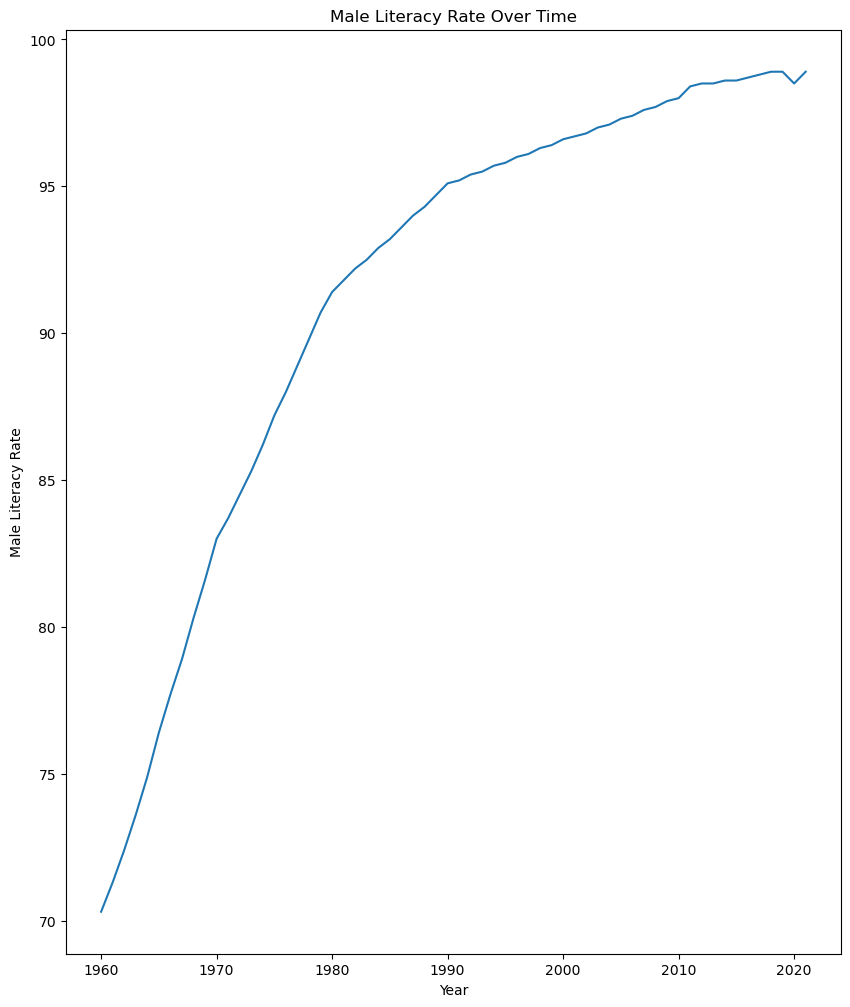

In [1043]:
# Plotting the literacy rate for males over time
plot_literacy_rate_scatter(df, 'Male')


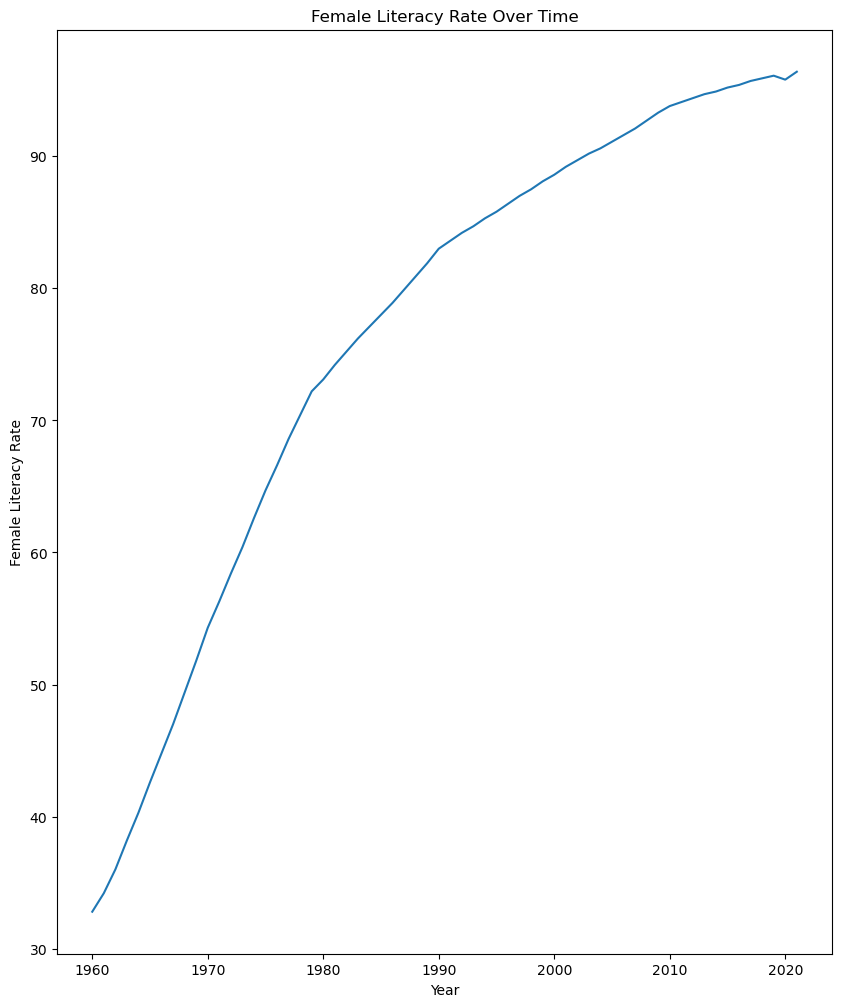

In [1044]:

# Plotting the literacy rate for females over time
plot_literacy_rate_scatter(df, y='Female')

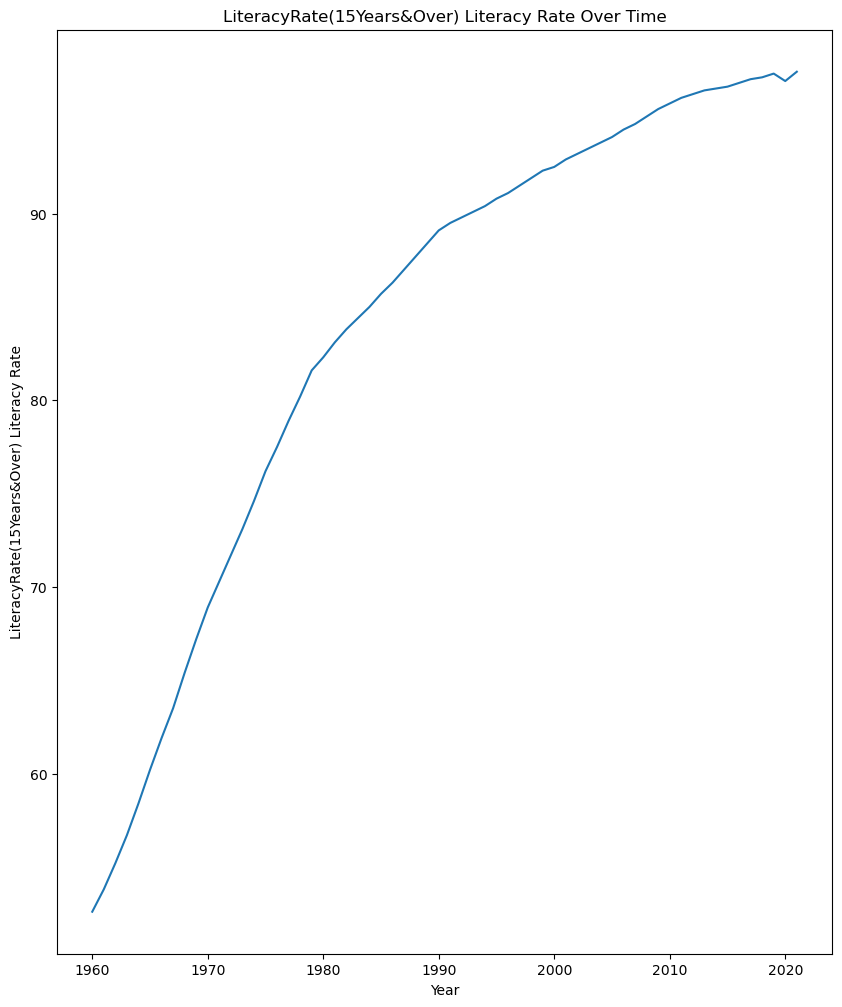

In [1045]:
# Plotting the literacy rate for females over time
plot_literacy_rate_scatter(df, y='LiteracyRate(15Years&Over)')

#### Fitting the Curve --Male Literacy Rate Over time 

#### Linear Fit

In [1049]:
def linear_regression(x, y):
    """
    Performs linear regression and returns the slope, intercept, and R-squared value.
    """
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    # Print the linear regression results
    print(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}")
    print(f"R-squared: {r_value**2:.4f}")
    
    return slope, intercept


In [1083]:

def plot_linear_fit(x, y, slope, intercept):
    """
    Plots the original data and the linear fit on the same graph.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Male', color='blue')
    plt.plot(x, slope * x + intercept, color='red', label='Linear Fit')
    plt.xlabel('Year')
    plt.ylabel('Literacy Rate')
    plt.title('Linear Fit of Literacy Rate Male Over Time')
    plt.legend()
    plt.show()


In [1085]:
# Function to evaluate the model performance
def evaluate_linear_fit(x, y, slope, intercept):
    """
    Evaluates the linear fit using R², RMSE, MSE, and MAE.
    """
    # Predictions using the linear model
    y_pred = slope * x + intercept

    # Calculate R²
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)

    # Calculate RMSE, MAE, and MSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Print evaluation metrics
    print(f"R²_lin: {r2:.4f}")
    print(f"RMSE_lin: {rmse:.4f}")
    print(f"MAE_lin: {mae:.4f}")
    print(f"MSE_lin: {mse:.4f}")

Linear Regression: y = 0.41x + -721.45
R-squared: 0.8154


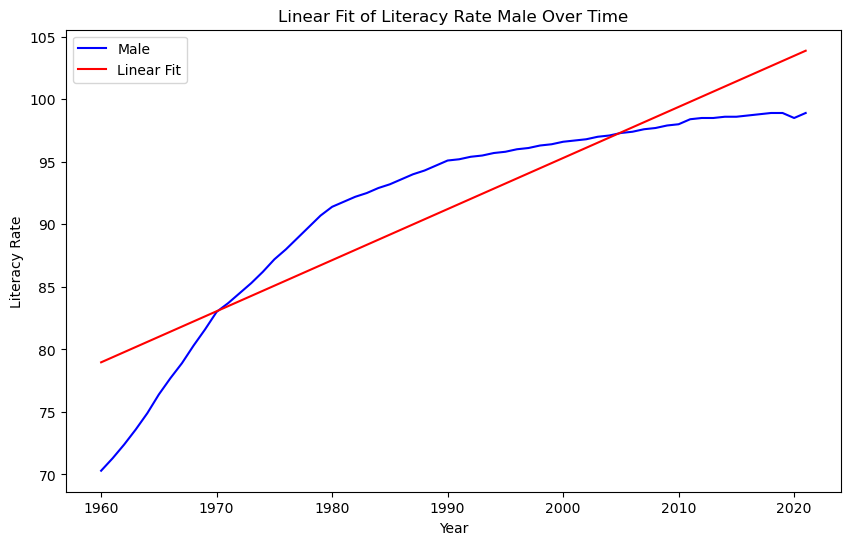

R²_lin: 0.8154
RMSE_lin: 3.4767
MAE_lin: 2.8996
MSE_lin: 12.0873


In [1087]:
# Extract the year (x) and male literacy rate (y)
x = df.index.values  # Year data
y = df['Male'].values 

# Perform linear regression
slope, intercept = linear_regression(x, y)

# Plot the original data and the linear fit
plot_linear_fit(x, y, slope, intercept)

# Evaluate the linear fit performance
evaluate_linear_fit(x, y, slope, intercept)


#### Polynomial Fit

In [1054]:
def polynomial_fit(x, y, degree=2):
    """
    Performs polynomial fitting of a given degree and returns the polynomial coefficients.
    """
    coefficients = np.polyfit(x, y, degree)
    # Print the polynomial coefficients
    print(f'Polynomial Coefficients (Degree {degree}): {coefficients}')
    
    # Create a polynomial function
    poly_func = np.poly1d(coefficients)
    
    return poly_func


In [1055]:
def plot_polynomial_fit(x, y, poly_func, degree):
    """
    Plots the original data and the polynomial fit on the same graph.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Male', color='blue')
    plt.plot(x, poly_func(x), color='red', label=f'Polynomial Fit (Degree {degree})')
    plt.xlabel('Year')
    plt.ylabel('Male Literacy Rate')
    plt.title(f'Polynomial Fit of Literacy Rate (Male) Over Time (Degree {degree})')
    plt.legend()
    plt.show()


In [1056]:
# Function to evaluate the model performance
def evaluate_polynomial_fit(x, y, poly_func):
    """
    Evaluates the polynomial fit using R², RMSE, MSE, and MAE.
    """
    # Predictions using the polynomial function
    y_pred = poly_func(x)

    # Calculate R²
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)

    # Calculate RMSE, MAE, and MSE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Print evaluation metrics
    print(f"R²_poly: {r2:.4f}")
    print(f"RMSE_poly: {rmse:.4f}")
    print(f"MAE_poly: {mae:.4f}")
    print(f"MSE_poly: {mse:.4f}")


Polynomial Coefficients (Degree 2): [-1.15054708e-02  4.62116547e+01 -4.63034778e+04]


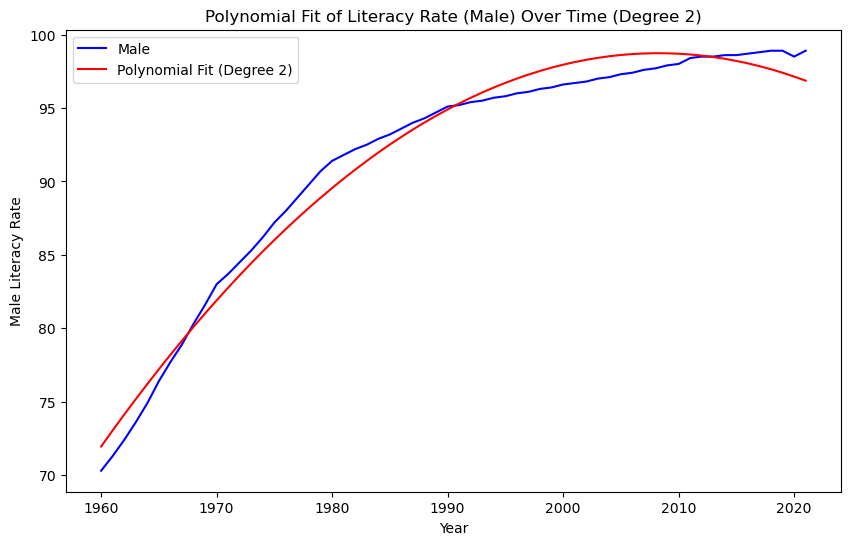

R²_poly: 0.9811
RMSE_poly: 1.1111
MAE_poly: 0.9850
MSE_poly: 1.2346


In [1057]:
# Extract the year (x) and male literacy rate (y)
x = df.index.values  # Year data
y = df['Male'].values 

# Perform polynomial fitting (degree 2)
degree = 2
poly_func = polynomial_fit(x, y, degree)

# Plot the original data and the polynomial fit
plot_polynomial_fit(x, y, poly_func, degree)

# Evaluate the polynomial fit performance
evaluate_polynomial_fit(x, y, poly_func)


#### Exponential Fit

In [1059]:
def exponential(t, n0, g):
    """
    Calculates exponential function with scale factor n0 and growth rate g.
    """
    f = n0 * np.exp(g*t)

    return f

In [1060]:
# Define the exponential function for fitting
def exponential(t, n0, g):
    """
    Exponential function with scale factor n0 and growth rate g.
    """
    return n0 * np.exp(g * t)

In [1066]:
# Function for fitting the exponential model to the data
def fit_exponential(df):
    """
    Fits the data to an exponential function, returns the fitted parameters and uncertainties.
    
    :param df: DataFrame containing the data with 'Male' literacy rates.
    :return: Fitted parameters and their uncertainties
    """
    
    numeric_index = (df.index - 1970).values
    
    # Initial guess for parameters n0 and g
    p0 = (1.2e12, 0.003)

    # Perform the curve fitting
    p, cov = curve_fit(exponential, numeric_index, df['Male'], p0=p0)

    # Get uncertainties on each parameter
    sigma = np.sqrt(np.diag(cov))

    return p, sigma



N0 = 83.4269 +/- 0.718739
g = 0.00 +/- 0.00


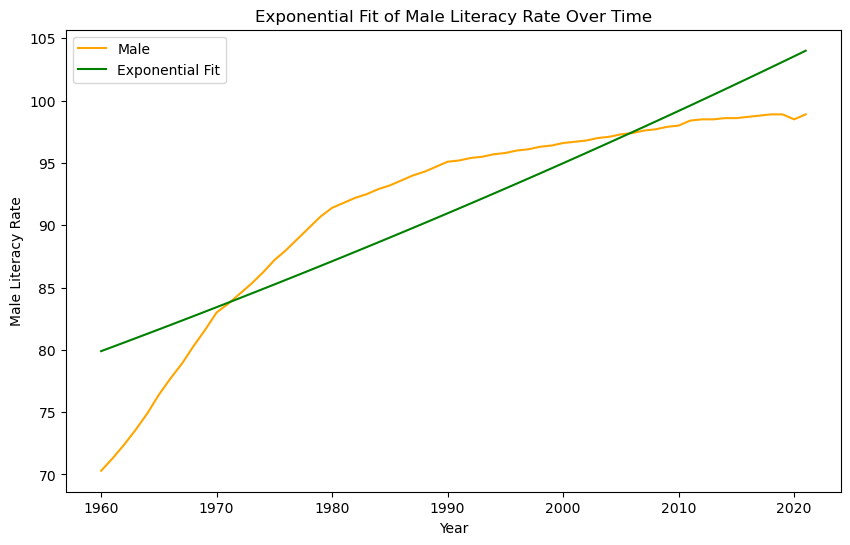

In [1090]:
# Function for plotting the data and the exponential fit
def plot_exponential_fit(df, p):
    """
    Plots the original data and the exponential fit.
    
    :param df: DataFrame containing the data with 'Male' literacy rates.
    :param p: Fitted parameters (n0, g) from the fit_exponential function.
    """

    numeric_index = (df.index - 1970).values
    df['expo_male']=exponential(numeric_index, *p)
    # Plot the original data and the exponential fit
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Male'], label='Male', color='orange')
    plt.plot(df.index, exponential(numeric_index, *p), color='green', label='Exponential Fit')
    
    # Labels and title
    plt.xlabel('Year')
    plt.ylabel('Male Literacy Rate')
    plt.title('Exponential Fit of Male Literacy Rate Over Time')
    plt.legend()
    
    # Display the plot
    plt.show()

# Call the fitting function and get the parameters and uncertainties
p, sigma = fit_exponential(df)

# Print the results
print(f"N0 = {p[0]:g} +/- {sigma[0]:g}")
print(f"g = {p[1]:.2f} +/- {sigma[1]:.2f}")

# Call the plotting function with the fitted parameters
plot_exponential_fit(df, p)



In [1092]:
# Function to evaluate the exponential fit
def evaluate_exponential_fit(df, p):
    """
    Evaluates the exponential fit using R², RMSE, MSE, and MAE.
    
    :param df: DataFrame containing the data with 'Male' literacy rates.
    :param p: Fitted parameters (n0, g).
    """
    numeric_index = (df.index - 1970).values
    
    # Predictions using the exponential model
    y_pred = exponential(numeric_index, *p)
    y_true = df['Male'].values
    
    # Calculate R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Calculate RMSE, MAE, and MSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Print evaluation metrics
    print(f"R²_expo: {r2:.4f}")
    print(f"RMSE_expo: {rmse:.4f}")
    print(f"MAE_expo: {mae:.4f}")
    print(f"MSE_expo: {mse:.4f}")

# Evaluate the exponential fit performance
evaluate_exponential_fit(df, p)

R²_expo: 0.7892
RMSE_expo: 3.7153
MAE_expo: 3.0648
MSE_expo: 13.8035


#### Logistic fit

In [1104]:
def logistic(t, n0, g, t0):
    """
    Calculates the logistic function with scale factor n0 and growth rate g
    """

    f = n0 / (1 + np.exp(-g*(t - t0)))

    return f

In [1133]:
def fit_logistic(df):
    """
    Fits the data to a logistic function, returns the fitted parameters and uncertainties.
    
    :param df: DataFrame containing the data with 'Male' literacy rates.
    :return: Fitted parameters and their uncertainties
    """
    # Convert index to numeric form (e.g., years since 1970)
    numeric_index = (df.index - 1970).values
    
    # Initial guess for parameters n0, g, t0
    p0 = (1.2e12, 0.03, 10)

    # Perform the curve fitting
    p, cov = curve_fit(logistic, numeric_index, df['Male'], p0=p0)

    # Get uncertainties on each parameter
    sigma = np.sqrt(np.diag(cov))

    return p, sigma


In [1135]:
p, _ = fit_logistic(df) 

In [1137]:
def plot_logistic_fit(df, p):
    """
    Plots the original data and the logistic fit.
    
    :param df: DataFrame containing the data with 'Male' literacy rates.
    :param p: Fitted parameters (n0, g, t0) from the fit_logistic function.
    """
    # Convert index to numeric form (e.g., years since 1970)
    numeric_index = (df.index - 1970).values
    
    # Apply logistic function using the fitted parameters
    df['logistics_male'] = logistic(numeric_index, *p)
    
    # Plot the original data and the logistic fit
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Male'], label='Male Literacy Rate', color='orange')
    plt.plot(df.index, df['logistics_male'], color='green', label='Logistic Fit')
    
    # Labels and title
    plt.xlabel('Year')
    plt.ylabel('Male Literacy Rate')
    plt.title('Logistic Fit of Male Literacy Rate Over Time')
    plt.legend()
    
    # Display the plot
    plt.show()

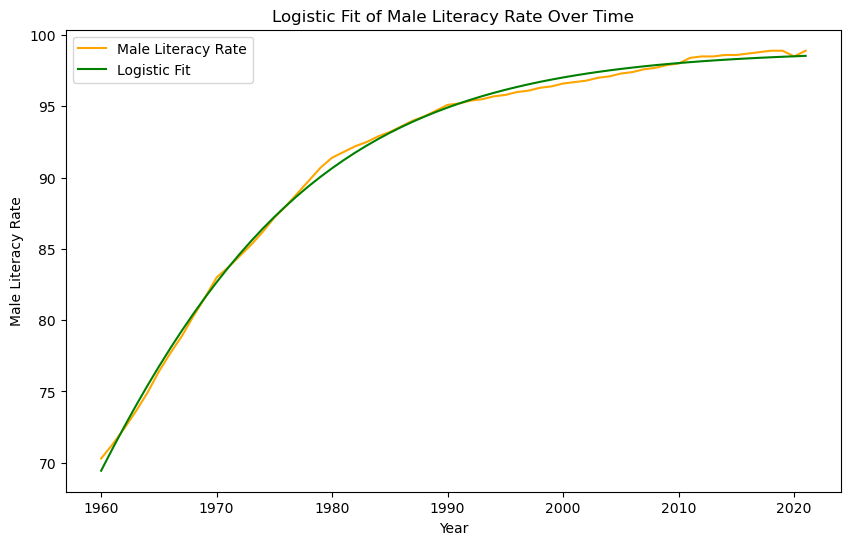

In [1139]:
plot_logistic_fit(df, p)

In [1149]:

def evaluate_logistic_fit(df, p):
    """
    Evaluates the logistic fit using R², RMSE, MSE, and MAE.
    
    :param df: DataFrame containing the data with 'Male' literacy rates.
    :param p: Fitted parameters (n0, g, t0).
    """
    numeric_index = (df.index - 1970).values  # Convert to numeric form
    
    # Predictions using the logistic model
    y_pred = logistic(numeric_index, *p)  # Ensure that p contains n0, g, t0
    y_true = df['Male'].values
    
    # Calculate R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - (ss_res / ss_tot)
    
    # Calculate RMSE, MAE, and MSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    # Print evaluation metrics
    print(f"R²_logistics: {r2:.4f}")
    print(f"RMSE_logistics: {rmse:.4f}")
    print(f"MAE_logistics: {mae:.4f}")
    print(f"MSE_logistics: {mse:.4f}")
    return logistics

logistics=evaluate_logistic_fit(df, p)

R²_logistics: 0.9982
RMSE_logistics: 0.3410
MAE_logistics: 0.2863
MSE_logistics: 0.1163


In [1154]:

# Define the evaluation metrics for each model
data = {
    'Model': ['Logistic', 'Exponential', 'Polynomial', 'Linear'],
    'R²': [0.9982, 0.7892, 0.9811, 0.8154],
    'RMSE': [0.3410, 3.7153, 1.1111, 3.4767],
    'MAE': [0.2863, 3.0648, 0.9850, 2.8996],
    'MSE': [0.1163, 13.8035, 1.2346, 12.0873]
}

# Create a DataFrame
df_comparison = pd.DataFrame(data)

df_comparison

Model      R²    RMSE     MAE      MSE
0     Logistic  0.9982  0.3410  0.2863   0.1163
1  Exponential  0.7892  3.7153  3.0648  13.8035
2   Polynomial  0.9811  1.1111  0.9850   1.2346
3       Linear  0.8154  3.4767  2.8996  12.0873

### Observations:
1. R² (Goodness of Fit):
Best Fit: Logistic model has the highest R² value (0.9982), which indicates that it explains 99.82% of the variance in the data,
meaning it provides the best fit among all models.

Worst Fit: The Exponential model has the lowest R² value (0.7892), meaning it only explains 78.92% of the variance, suggesting
it's not as good at fitting the data.

2. RMSE (Root Mean Squared Error):
Best Fit: Logistic model has the lowest RMSE value (0.3410), indicating that the difference between the predicted and actual values 
is small and the model makes the least amount of error in predicting.

Worst Fit: The Exponential model has the highest RMSE (3.7153), indicating that it is farthest from the actual values on average.

3. MAE (Mean Absolute Error):
Best Fit: Logistic model also has the lowest MAE (0.2863), meaning the average absolute difference between the predicted and 
actual values is the smallest.

Worst Fit: The Exponential model has the highest MAE (3.0648), showing that on average, its predictions deviate 
    significantly from the actual values.

4. MSE (Mean Squared Error):
Best Fit: Logistic model again has the lowest MSE (0.1163), which means its squared prediction errors are smaller than the other models.

Worst Fit: The Exponential model has the highest MSE (13.8035), indicating large prediction errors compared to the others.

Conclusion:
Based on all four evaluation metrics (R², RMSE, MAE, MSE), the Logistic model appears to be the best fit for your data. 
It provides the highest R² (indicating a good fit to the data), and the lowest values for RMSE, MAE, and MSE (indicating minimal error between the predicted and actual values).

In [1141]:
#### Apply logistic on male and Female

In [1143]:
# Fit the logistic model to the data for both Male and Female
def fit_logistic(df):
    """
    Fits the data to a logistic function for both Male and Female, returns the fitted parameters and uncertainties.
    
    :param df: DataFrame containing the data with 'Male' and 'Female' literacy rates.
    :return: Fitted parameters and their uncertainties for both Male and Female.
    """
    # Convert index to numeric form (e.g., years since 1970)
    numeric_index = (df.index - 1970).values
    
    # Initial guess for parameters n0, g, t0
    p0 = (1.2e12, 0.03, 10)

    # Perform the curve fitting for both Male and Female
    p_male, cov_male = curve_fit(logistic, numeric_index, df['Male'], p0=p0)
    p_female, cov_female = curve_fit(logistic, numeric_index, df['Female'], p0=p0)

    # Get uncertainties on each parameter for both Male and Female
    sigma_male = np.sqrt(np.diag(cov_male))
    sigma_female = np.sqrt(np.diag(cov_female))

    return p_male, sigma_male, p_female, sigma_female

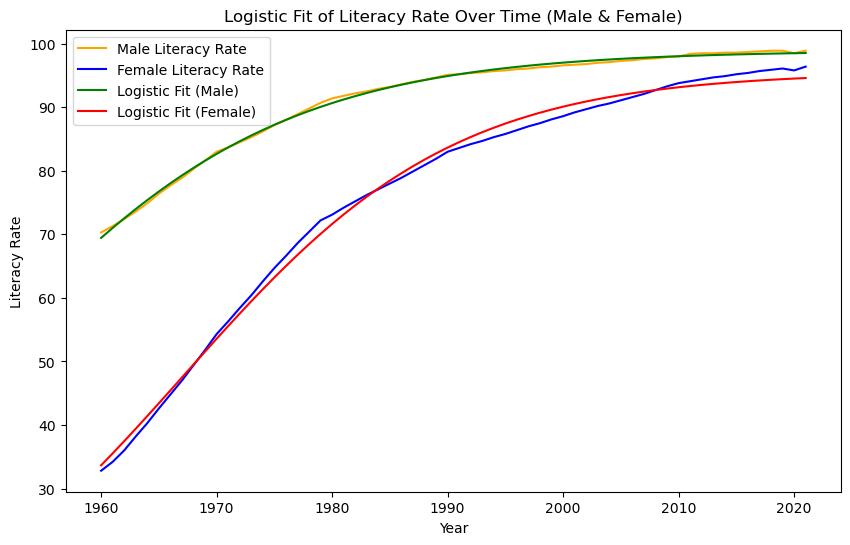

In [1145]:
# Plot the logistic fit for both Male and Female
def plot_logistic_fit(df, p_male, p_female):
    """
    Plots the original data and the logistic fits for both Male and Female.
    
    :param df: DataFrame containing the data with 'Male' and 'Female' literacy rates.
    :param p_male: Fitted parameters (n0, g, t0) for Male.
    :param p_female: Fitted parameters (n0, g, t0) for Female.
    """
    # Convert index to numeric form (e.g., years since 1970)
    numeric_index = (df.index - 1970).values
    
    # Apply logistic function using the fitted parameters for Male and Female
    df['logistics_male'] = logistic(numeric_index, *p_male)
    df['logistics_female'] = logistic(numeric_index, *p_female)
    
    # Plot the original data and the logistic fits for both Male and Female
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Male'], label='Male Literacy Rate', color='orange')
    plt.plot(df.index, df['Female'], label='Female Literacy Rate', color='blue')
    plt.plot(df.index, df['logistics_male'], color='green', label='Logistic Fit (Male)')
    plt.plot(df.index, df['logistics_female'], color='red', label='Logistic Fit (Female)')
    
    # Labels and title
    plt.xlabel('Year')
    plt.ylabel('Literacy Rate')
    plt.title('Logistic Fit of Literacy Rate Over Time (Male & Female)')
    plt.legend()
    
    # Display the plot
    plt.show()

# Example usage:
# Assuming `df` is your DataFrame with 'Male' and 'Female' columns
p_male, _, p_female, _ = fit_logistic(df)  # Fit the logistic models for both Male and Female
plot_logistic_fit(df, p_male, p_female)  # Plot the original data and logistic fits for both Male and Female


In [1192]:
def predict_future_values(p_male, p_female, future_years):
    """
    Predicts the future values using the fitted logistic parameters for both Male and Female literacy rates.
    
    :param p_male: Fitted parameters for Male literacy rate
    :param p_female: Fitted parameters for Female literacy rate
    :param future_years: List of years to predict
    :return: Predictions for both Male and Female literacy rates
    """
    # Convert years to numeric form for logistic function
    future_years_numeric = future_years - 1970
    
    # Logistic predictions for future years
    male_predictions = logistic(future_years_numeric, *p_male)
    female_predictions = logistic(future_years_numeric, *p_female)
    
    return male_predictions, female_predictions

# Predict future literacy rates for 2022, 2023, 2024
future_years = np.array([2022, 2023, 2024,2025,2026,2027,2028,2029])
male_predictions, female_predictions = predict_future_values(p_male, p_female, future_years)

# Print predictions for future years
print(f"Male Literacy Rate Predictions for future years: {male_predictions}")
print(f"Female Literacy Rate Predictions for future years: {female_predictions}")


Male Literacy Rate Predictions for future years: [98.56776183 98.5939442  98.61820002 98.64067019 98.66148546 98.68076707
 98.69862748 98.715171  ]
Female Literacy Rate Predictions for future years: [94.67872517 94.74993516 94.81541565 94.87562059 94.93096904 94.98184773
 95.02861337 95.07159486]


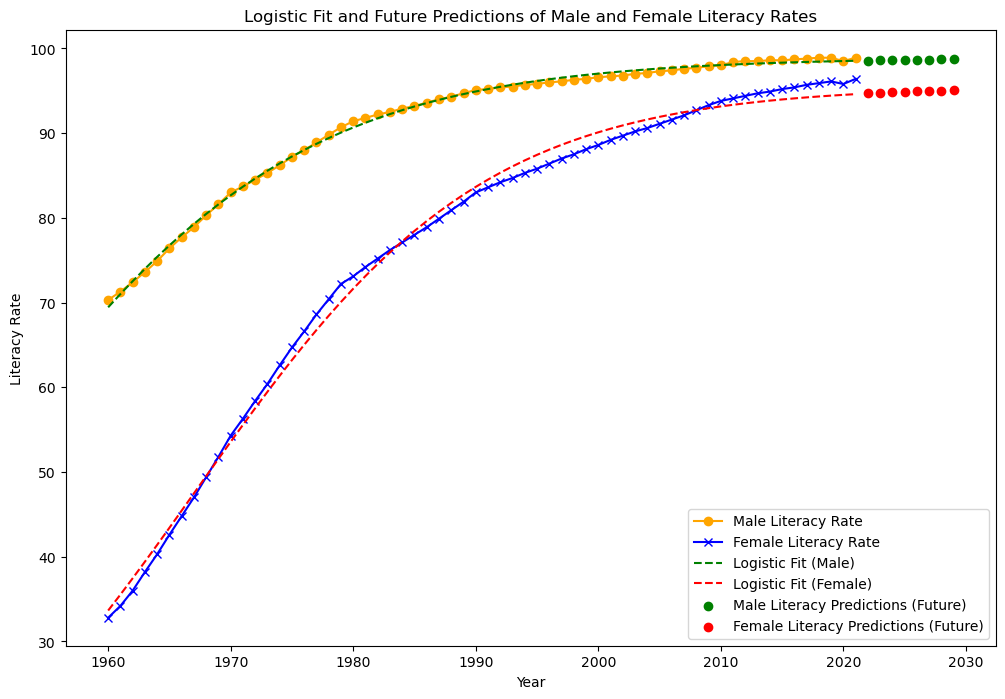

In [1194]:
# Plot the original data and future predictions
plt.figure(figsize=(12, 8))

# Plot original Male and Female Literacy rates
plt.plot(df.index, df['Male'], label='Male Literacy Rate', color='orange', marker='o')
plt.plot(df.index, df['Female'], label='Female Literacy Rate', color='blue', marker='x')

# Plot Logistic Fits for Male and Female
plt.plot(df.index, df['Male_logistic'], label='Logistic Fit (Male)', color='green', linestyle='--')
plt.plot(df.index, df['Female_logistic'], label='Logistic Fit (Female)', color='red', linestyle='--')

# Plot Future Predictions for Male and Female
plt.scatter(future_years, male_predictions, color='green', label='Male Literacy Predictions (Future)', zorder=5)
plt.scatter(future_years, female_predictions, color='red', label='Female Literacy Predictions (Future)', zorder=5)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Literacy Rate')
plt.title('Logistic Fit and Future Predictions of Male and Female Literacy Rates')

# Show legend
plt.legend()

# Display the plot
plt.show()



#### Observations:
Predictions for Future Years
Future Predictions: The predicted literacy rates for future years (2022, 2023, 2024) show the expected progression.
These projections can be useful for policymakers to plan for future educational needs and set realistic goals.



### Conclusion:

The curve fitting and analysis of literacy rates over time provide valuable insights into how education systems are evolving,
the potential future trends in literacy, and the need for continued targeted efforts.
While the data suggests positive growth in literacy rates, the logistic fit highlights the eventual slowing of this growth, 
which necessitates proactive policy changes and strategic planning in education to sustain or accelerate improvements.
